# PROJECT AKHIR RAKAMIN - HOME CREDIT  
### CREDIT SCORING    


- Tujuan :
  - Memprediksi apakah peminjam akan mengalami gagal bayar atau tidak

## Data Pre - processing

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# assesing data
aptrain = pd.read_csv('application_train.csv')
aptrain.shape

(307511, 122)

In [3]:
# cek missing value objek 
aptrain.select_dtypes(include=['object']).isna().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [4]:
# mengatasi missing value objek dengan simple imputer 
from sklearn.impute import SimpleImputer
modeimput = SimpleImputer(strategy = 'most_frequent')
aptrain[['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']] = modeimput.fit_transform(aptrain[['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']])

In [5]:
# cek missing value objek 
aptrain.select_dtypes(include=['object']).isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64

In [6]:
# missing value numerik
hilang = aptrain.select_dtypes(exclude=['object']).isna().sum().reset_index()
hilang.columns = ['column', 'missing']
hilang = hilang[hilang['missing'] > 0]
print(hilang)

                         column  missing
5                   AMT_ANNUITY       12
6               AMT_GOODS_PRICE      278
12                  OWN_CAR_AGE   202929
19              CNT_FAM_MEMBERS        2
29                 EXT_SOURCE_1   173378
..                          ...      ...
101   AMT_REQ_CREDIT_BUREAU_DAY    41519
102  AMT_REQ_CREDIT_BUREAU_WEEK    41519
103   AMT_REQ_CREDIT_BUREAU_MON    41519
104   AMT_REQ_CREDIT_BUREAU_QRT    41519
105  AMT_REQ_CREDIT_BUREAU_YEAR    41519

[61 rows x 2 columns]


In [7]:
# menghilangkan missing value numerik
aptrain['OWN_CAR_AGE'] = aptrain['OWN_CAR_AGE'].fillna(aptrain['OWN_CAR_AGE'].mean())

target = aptrain['TARGET']
aptrain = aptrain.drop(columns='TARGET')
aptrain = aptrain.fillna(0)

aptrain['TOTALAREA_MODE'] = aptrain[['APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 
                            'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
                            'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 
                            'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE']].sum(axis=1)

In [8]:
# banyak target
target.shape

(307511,)

In [9]:
# cek missing value 
aptrain.isna().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

In [10]:
# cek missing value semua data 
aptrain.isna().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

In [11]:
# cek duplikat 
aptrain.duplicated().sum()

0

In [12]:
# cek outlier dengan tukey fence
q1 = aptrain.quantile(0.25, numeric_only=True)
q3 = aptrain.quantile(0.75, numeric_only=True)
iqr = q3 - q1
bawah = q1 - (1.5 * iqr)
atas = q3 + (1.5 * iqr)

#melakukan filter outlier 
out = (aptrain.select_dtypes(exclude=['object']) < bawah) | (aptrain.select_dtypes(exclude=['object']) > atas)

#print outlier 
for kol in out.columns:
    print (f"outlier di kolom {kol}")
    print (out[kol].value_counts())
    print('-'*50)

outlier di kolom SK_ID_CURR
SK_ID_CURR
False    307511
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom CNT_CHILDREN
CNT_CHILDREN
False    303239
True       4272
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom AMT_INCOME_TOTAL
AMT_INCOME_TOTAL
False    293476
True      14035
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom AMT_CREDIT
AMT_CREDIT
False    300949
True       6562
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom AMT_ANNUITY
AMT_ANNUITY
False    300007
True       7504
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom AMT_GOODS_PRICE
AMT_GOODS_PRICE
False    292783
True      14728
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom REGION_POPULATION_RELATIVE
REGION_POPULATION_RELATIVE
False    299099
True       84

In [13]:
# mengatasi outlier dengan winsorize
from scipy.stats.mstats import winsorize
for kol in out.columns:
    if out[kol].any(): 
        aptrain[kol] = np.where(aptrain[kol] < bawah[kol], bawah[kol], aptrain[kol])
        aptrain[kol] = np.where(aptrain[kol] > atas[kol], atas[kol], aptrain[kol])

In [14]:
#cek outlier 
q1 = aptrain.quantile(0.25, numeric_only=True)
q3 = aptrain.quantile(0.75, numeric_only=True)
iqr = q3 - q1
bawah = q1 - (1.5 * iqr)
atas = q3 + (1.5 * iqr)

#melakukan filter outlier 
out = (aptrain.select_dtypes(exclude=['object']) < bawah) | (aptrain.select_dtypes(exclude=['object']) > atas)

#print outlier 
for kol in out.columns:
    print (f"outlier di kolom {kol}")
    print (out[kol].value_counts())
    print('-'*50)

outlier di kolom SK_ID_CURR
SK_ID_CURR
False    307511
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom CNT_CHILDREN
CNT_CHILDREN
False    307511
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom AMT_INCOME_TOTAL
AMT_INCOME_TOTAL
False    307511
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom AMT_CREDIT
AMT_CREDIT
False    307511
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom AMT_ANNUITY
AMT_ANNUITY
False    307511
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom AMT_GOODS_PRICE
AMT_GOODS_PRICE
False    307511
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom REGION_POPULATION_RELATIVE
REGION_POPULATION_RELATIVE
False    307511
Name: count, dtype: int64
--------------------------------------------------
outlier di kolom

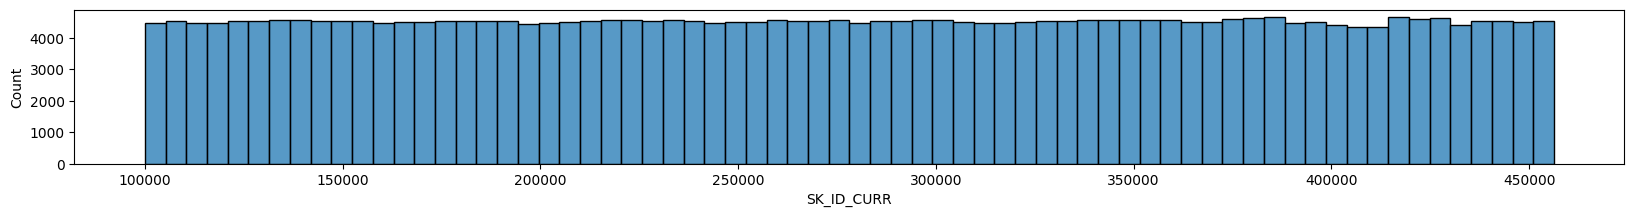

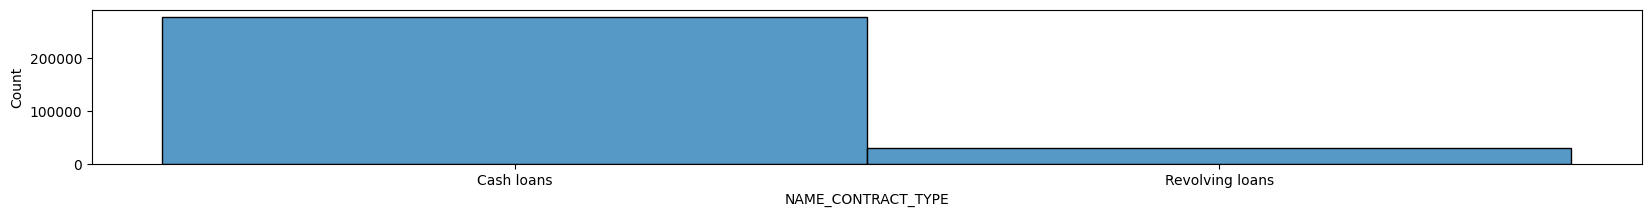

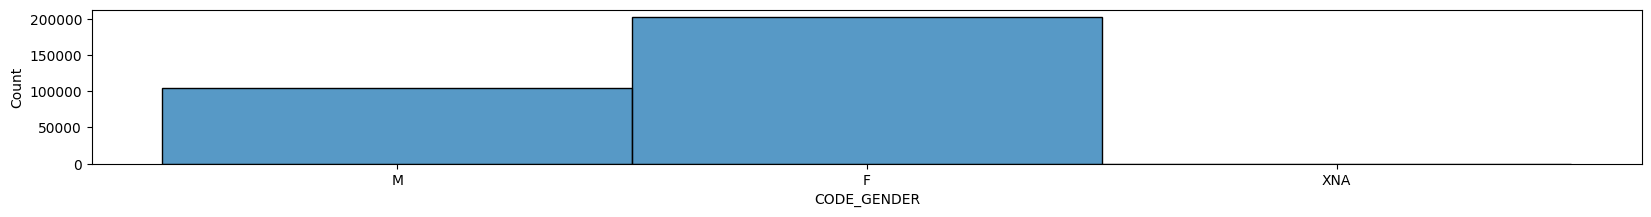

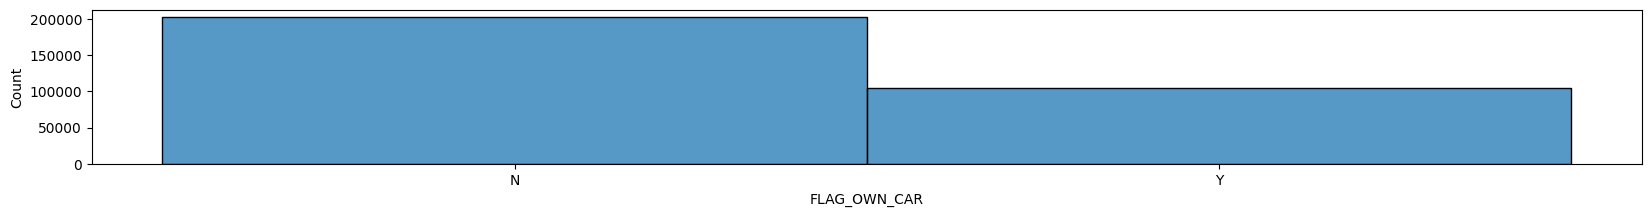

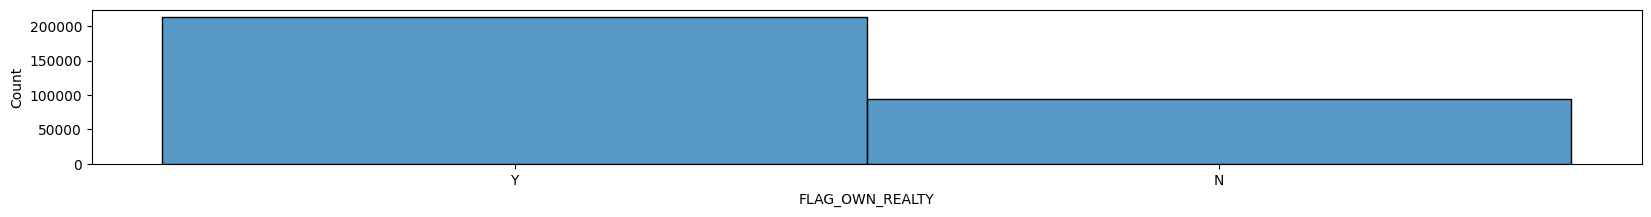

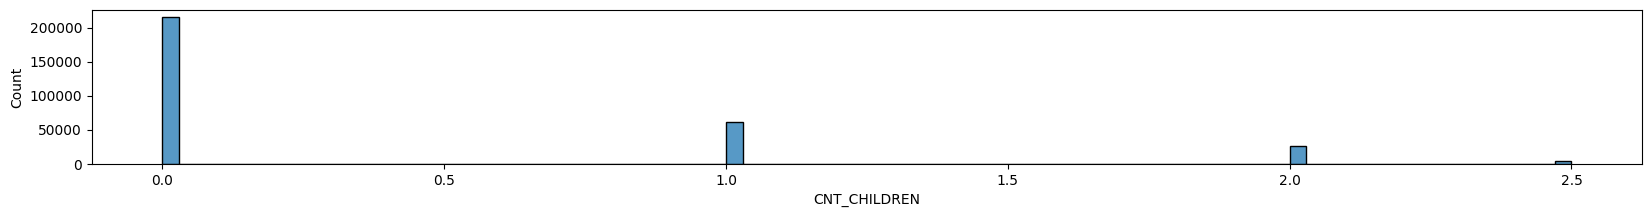

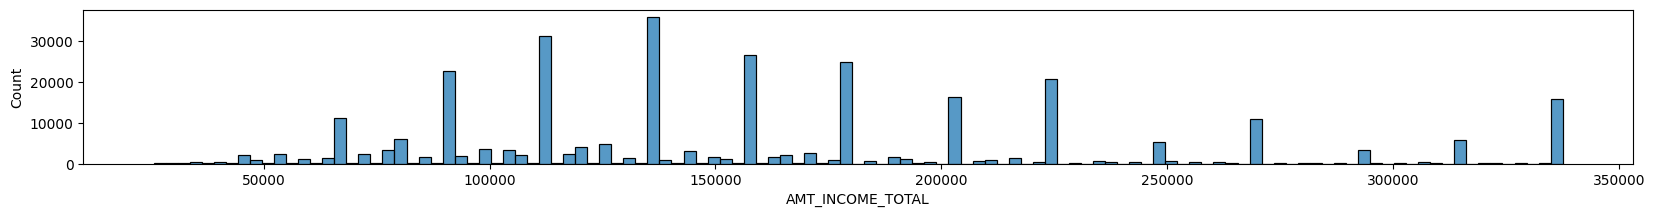

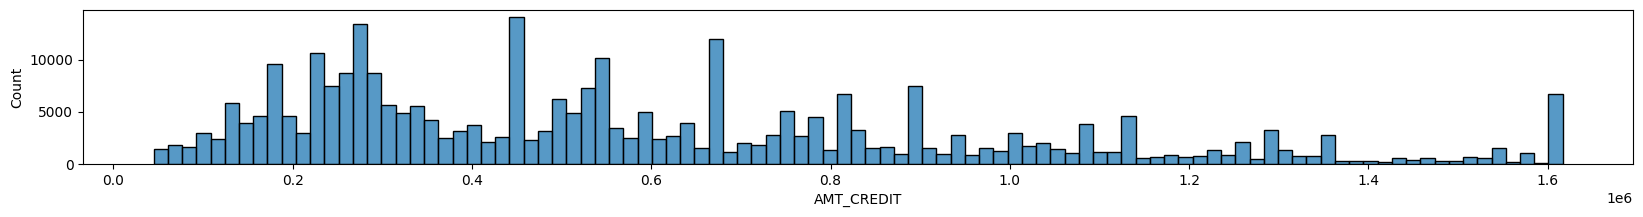

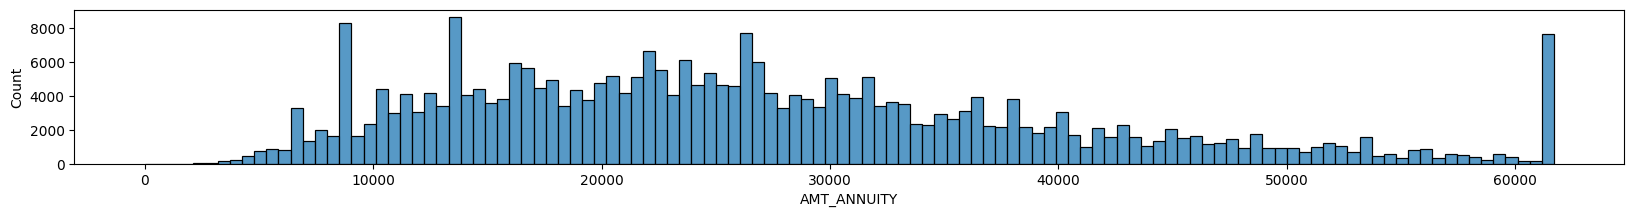

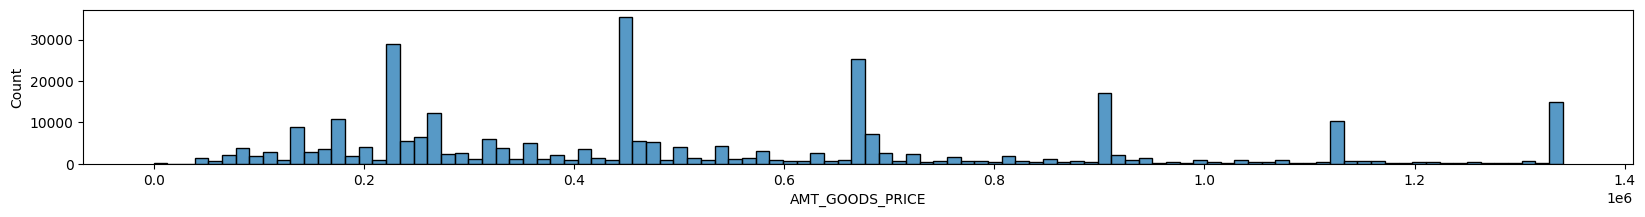

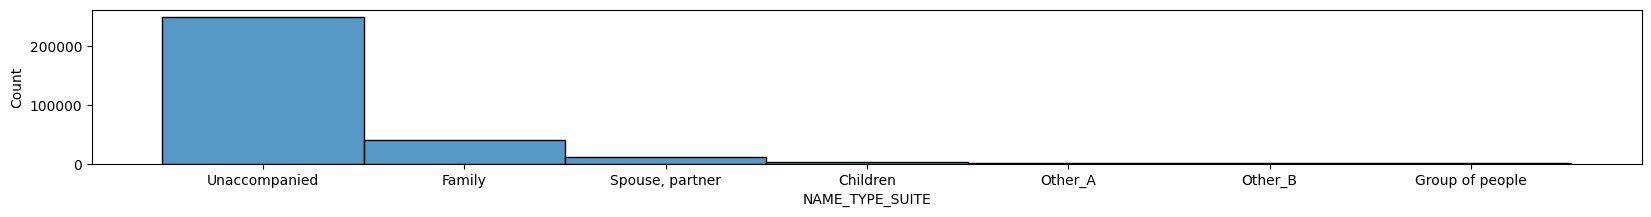

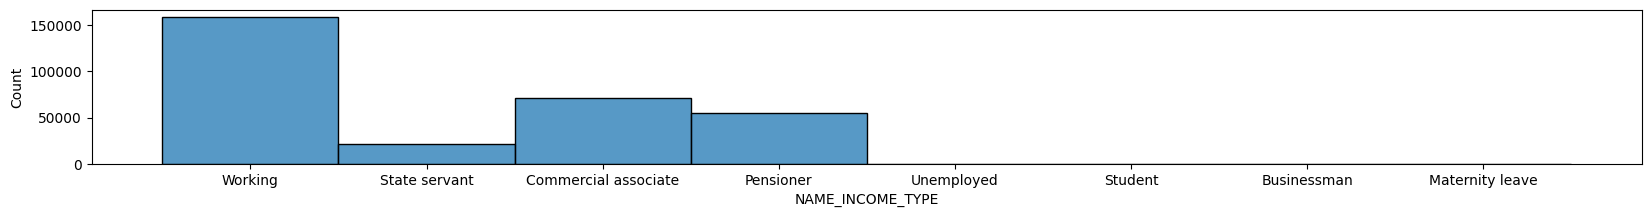

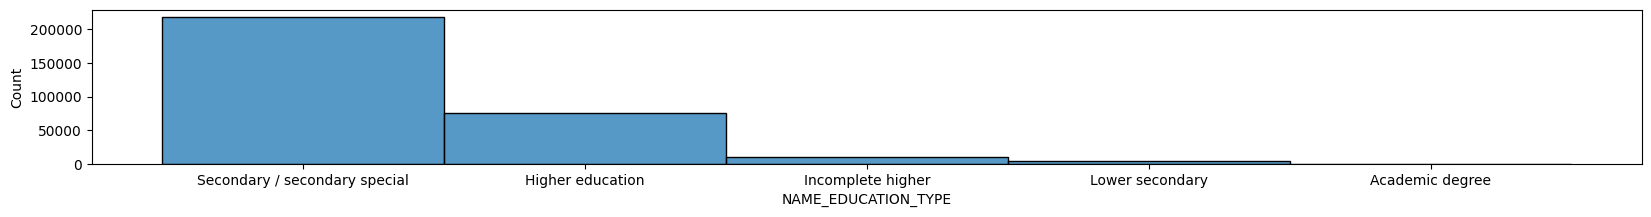

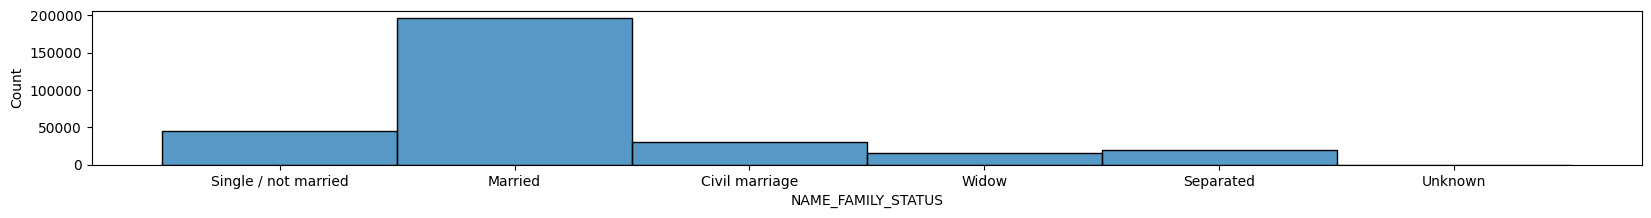

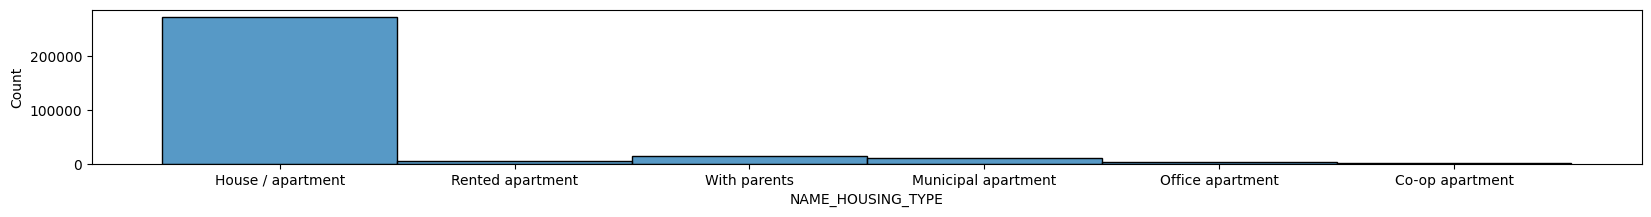

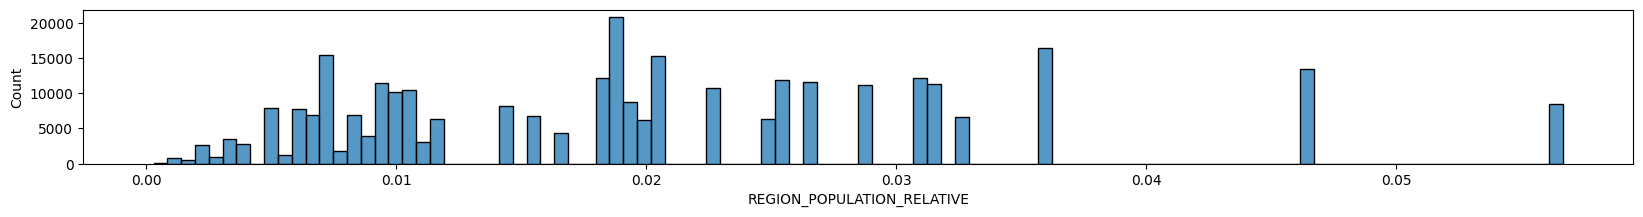

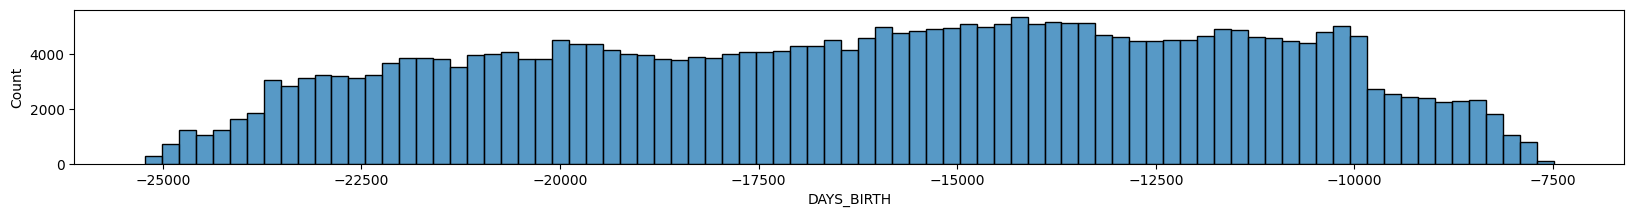

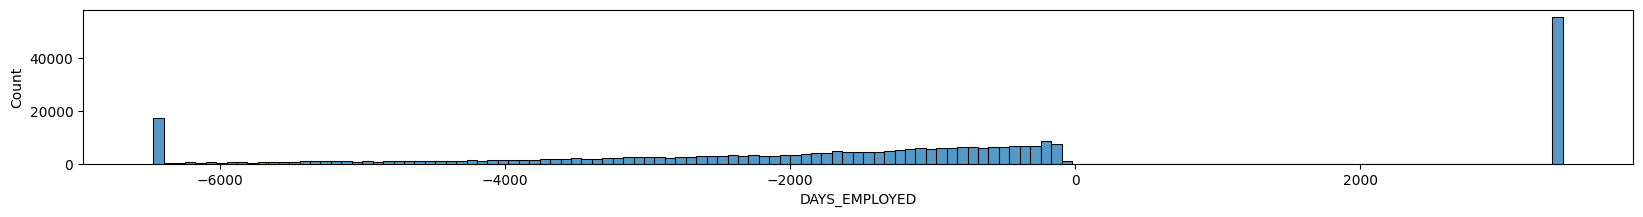

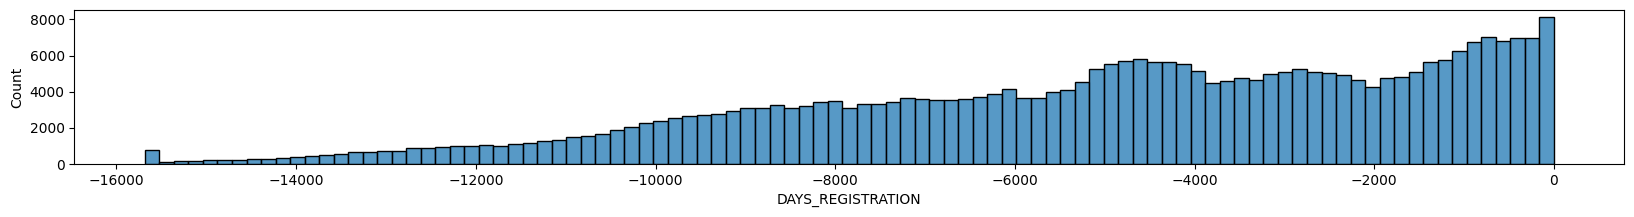

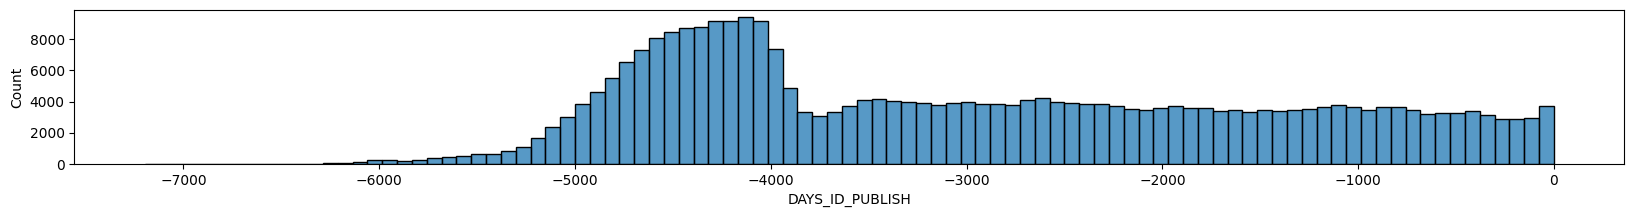

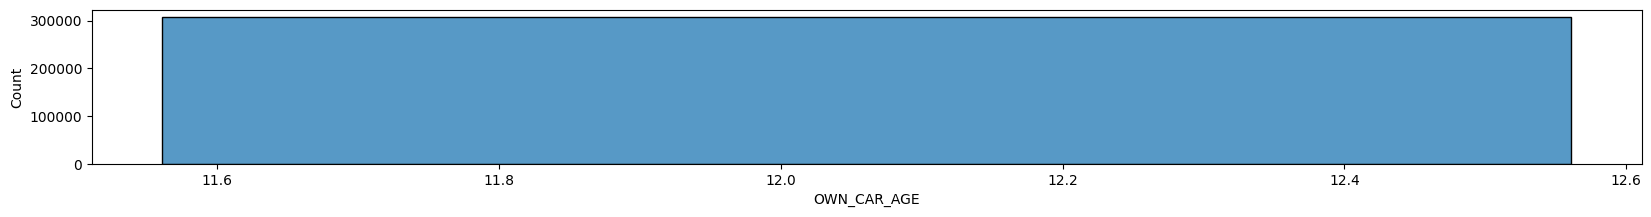

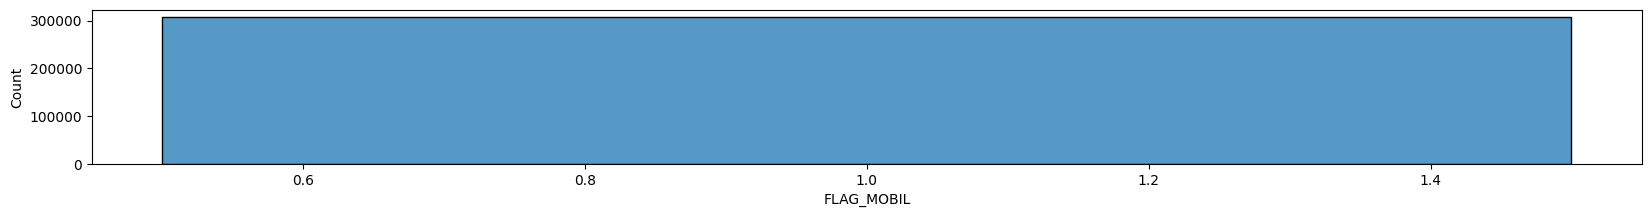

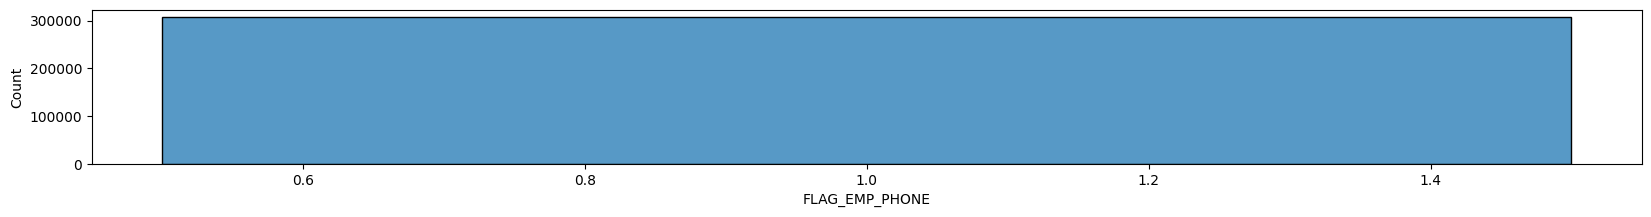

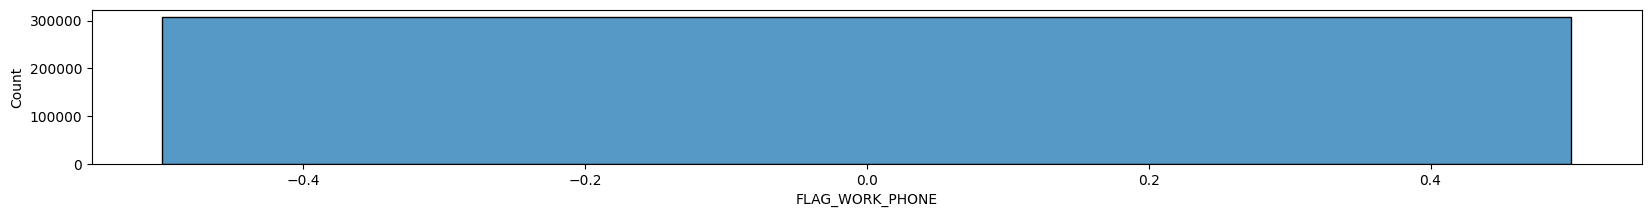

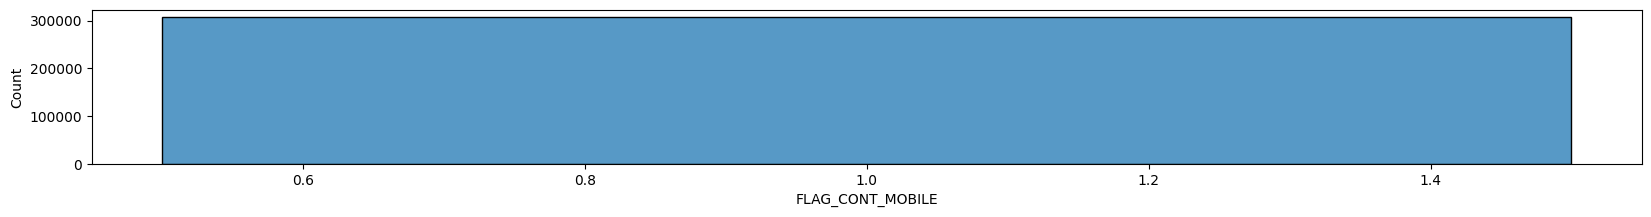

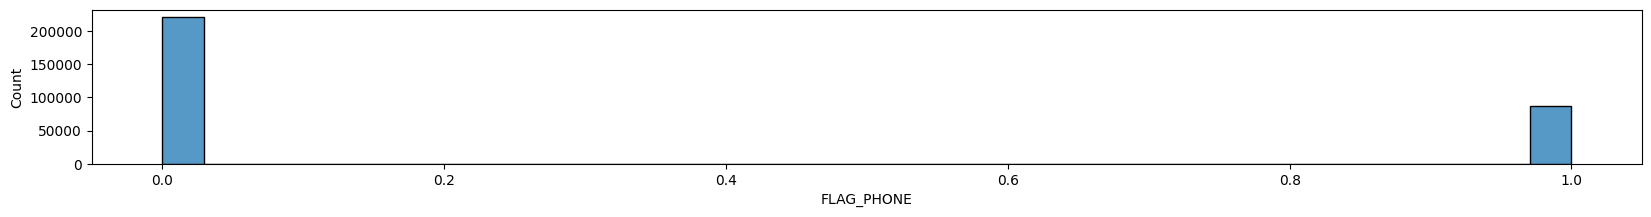

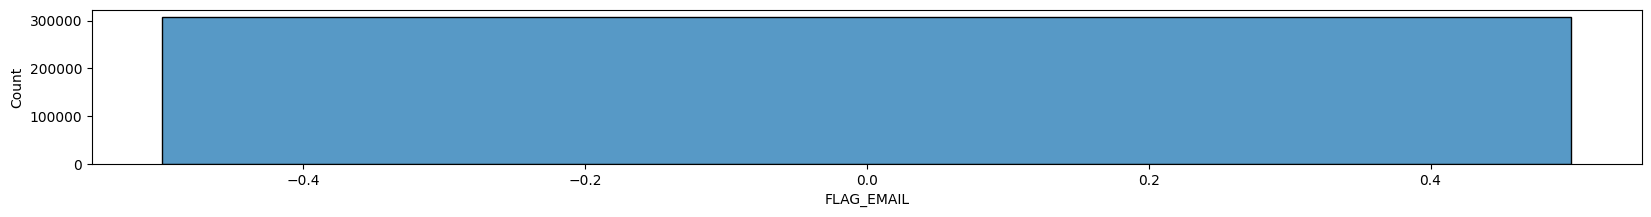

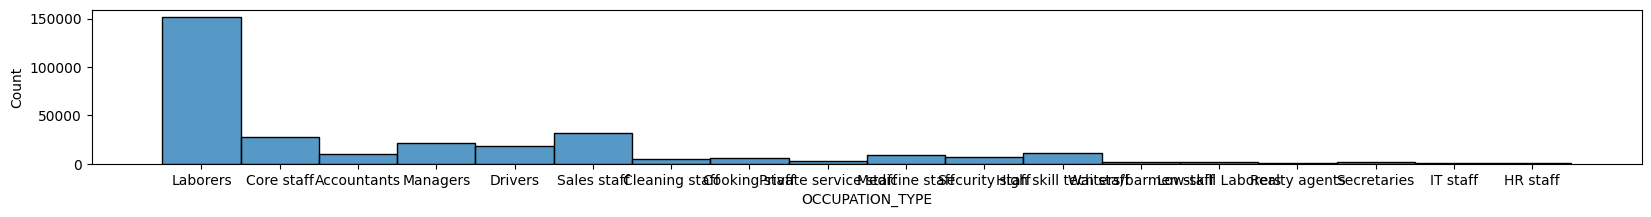

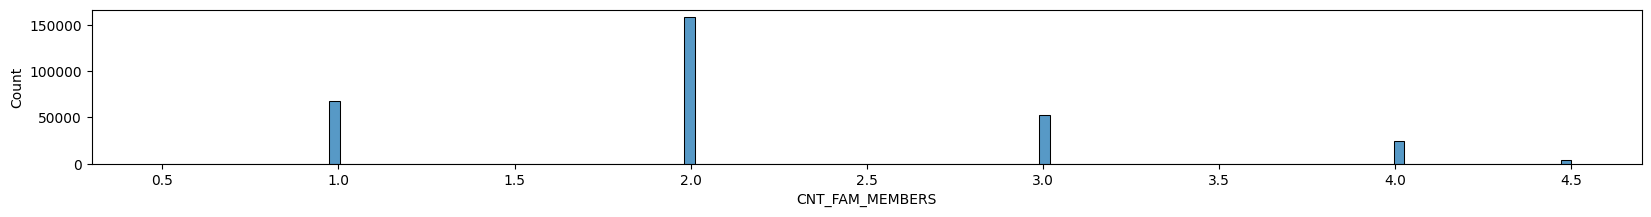

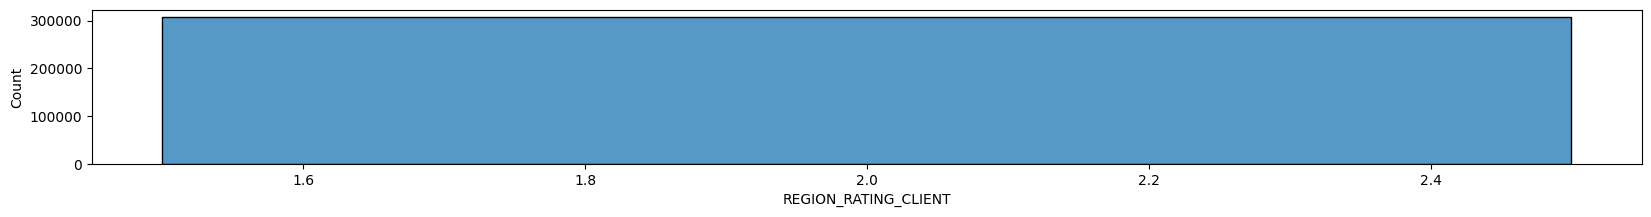

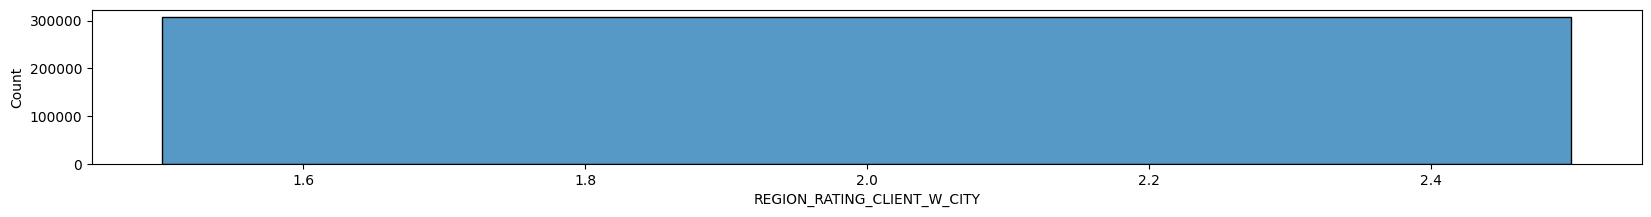

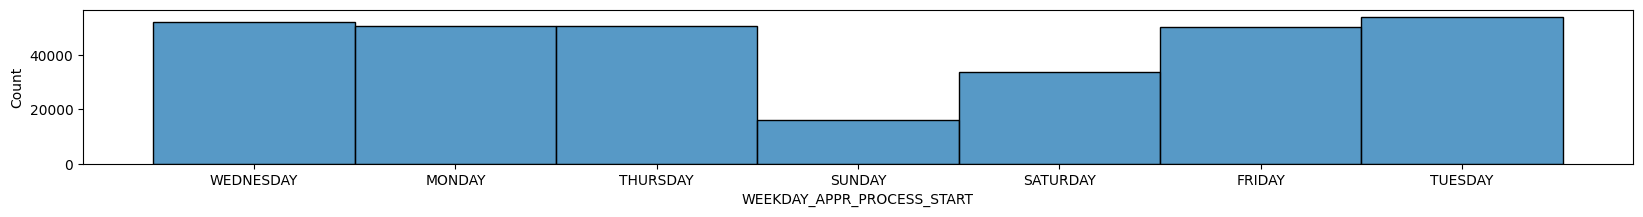

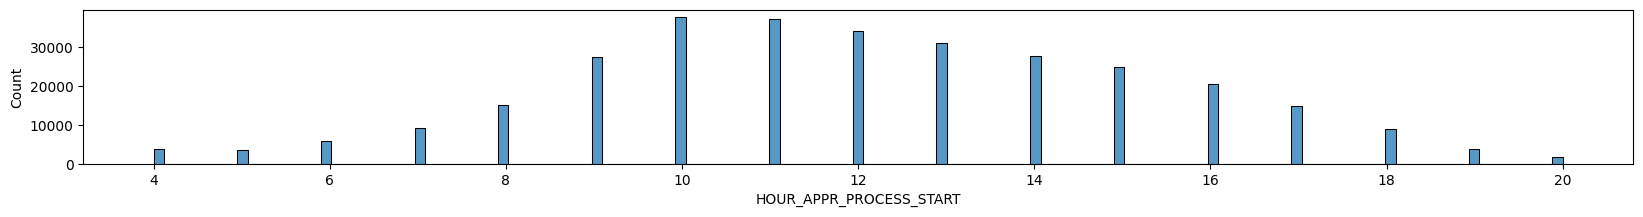

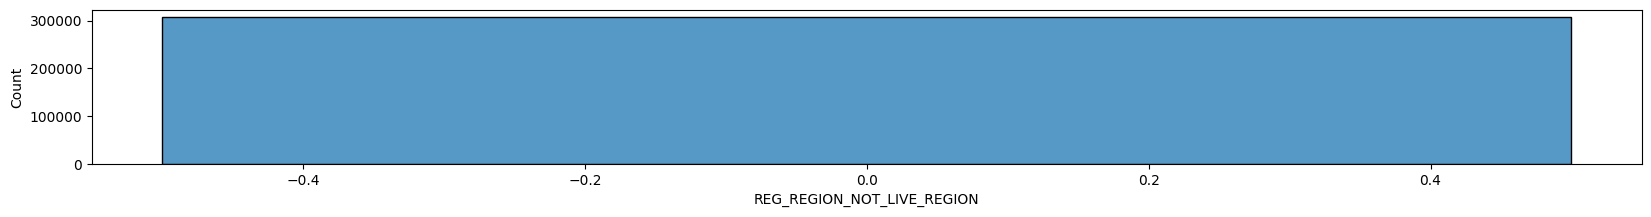

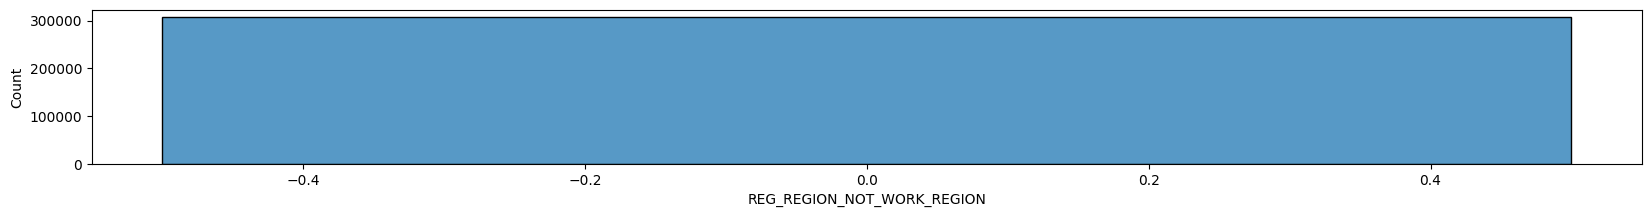

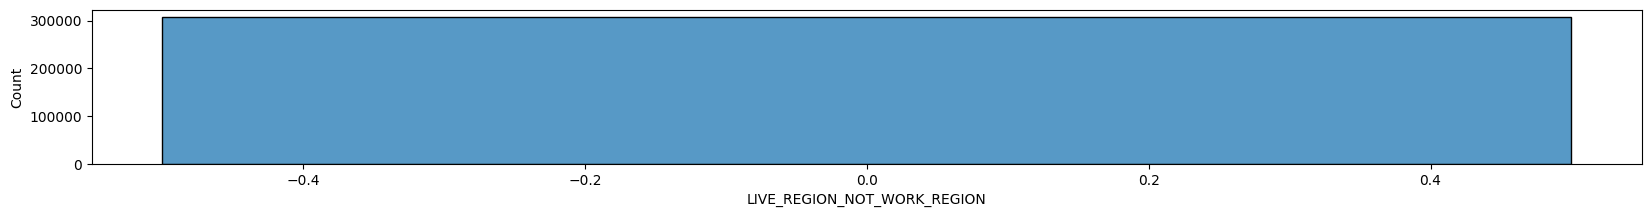

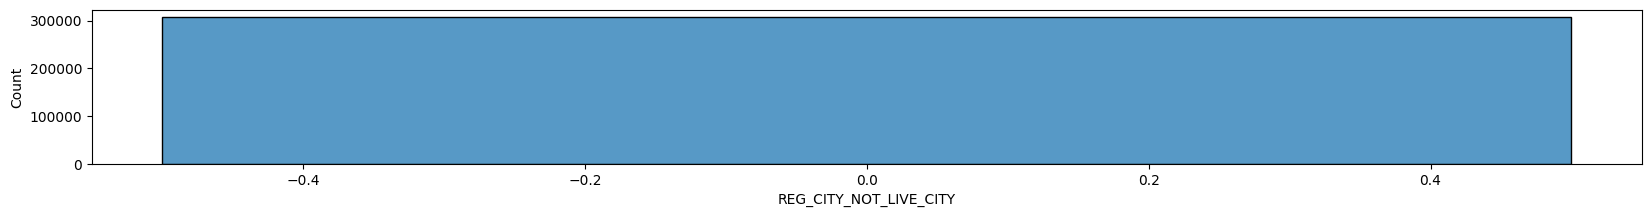

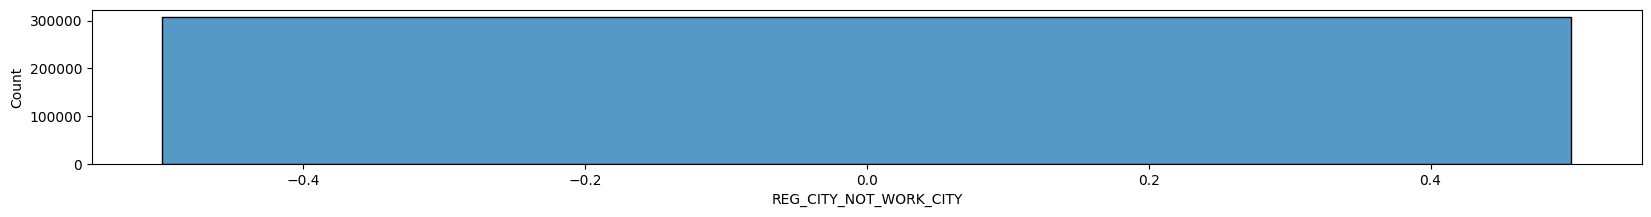

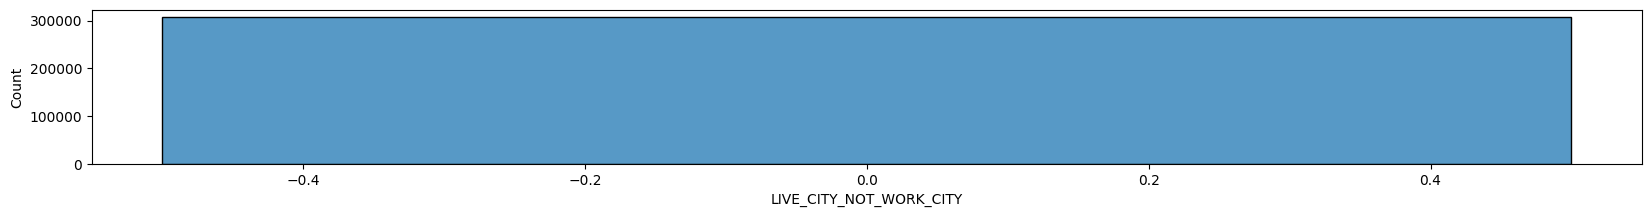

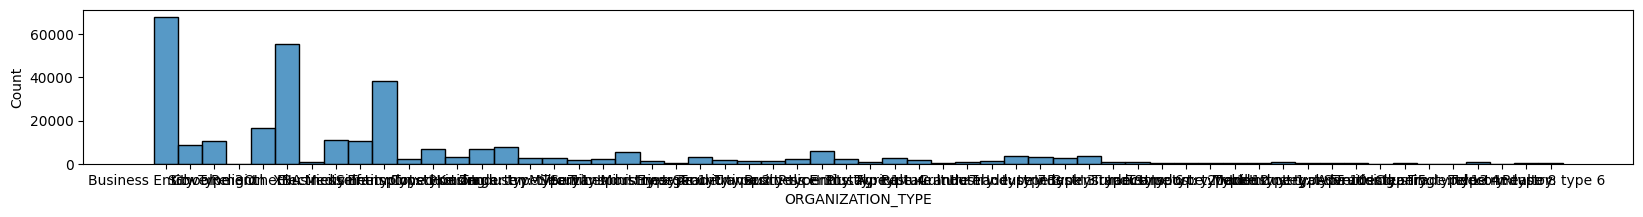

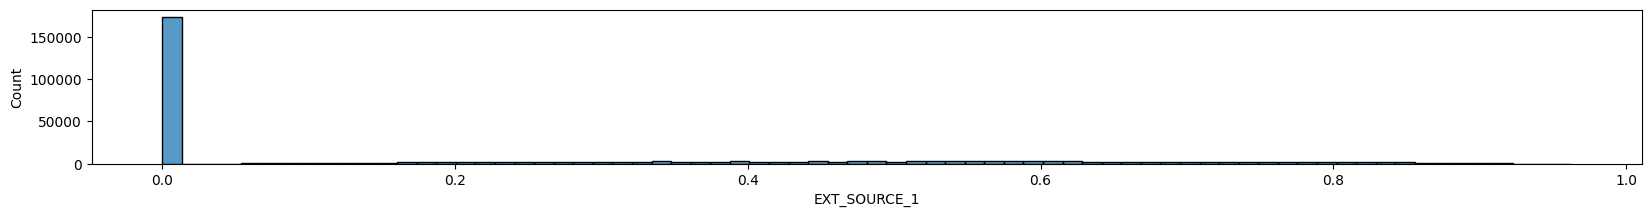

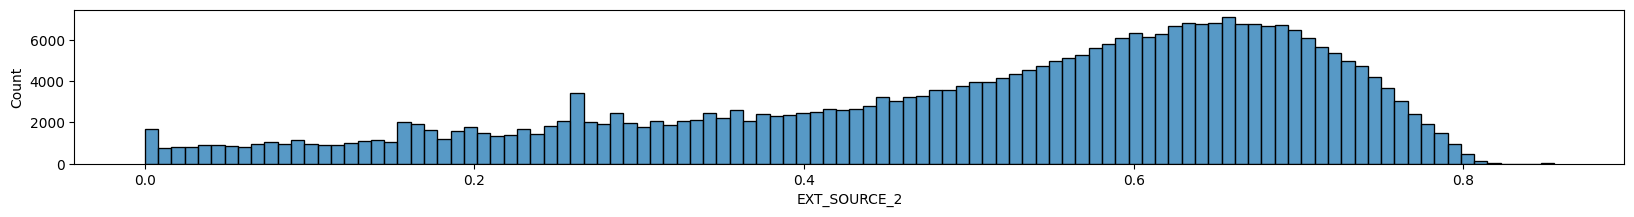

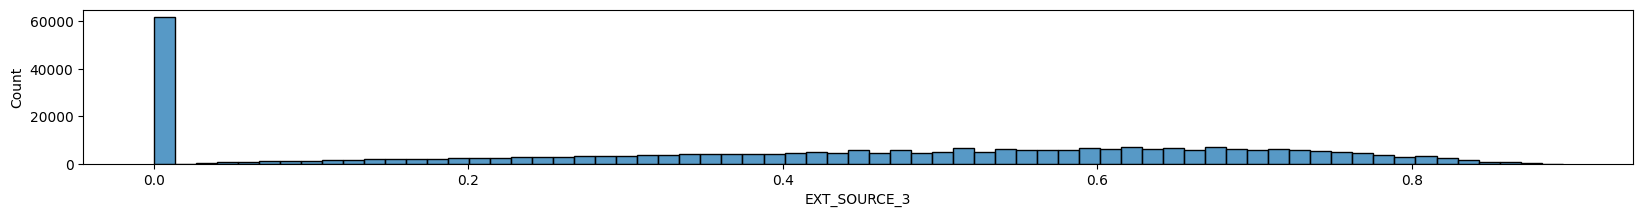

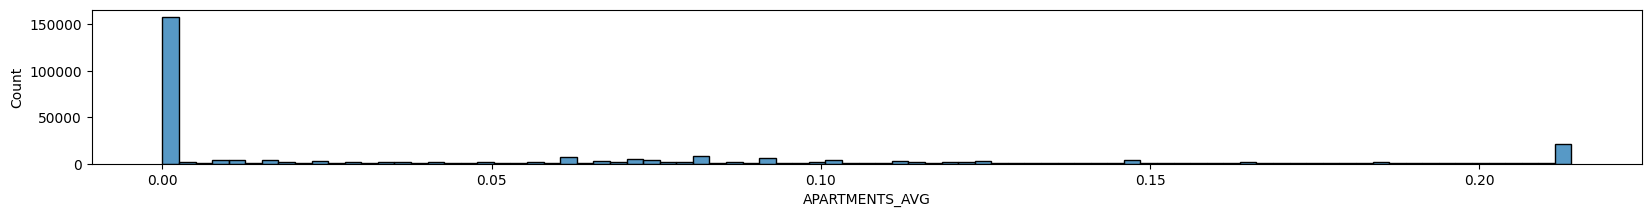

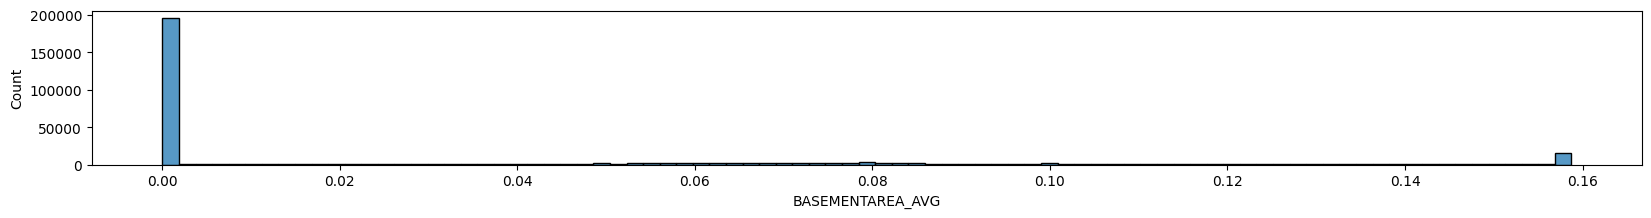

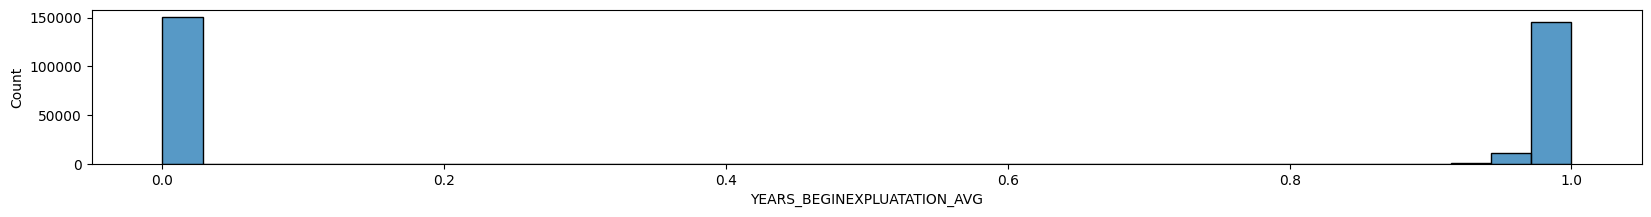

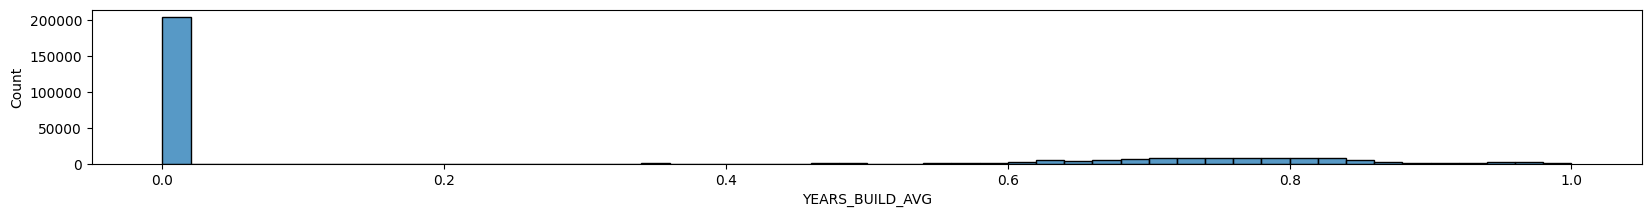

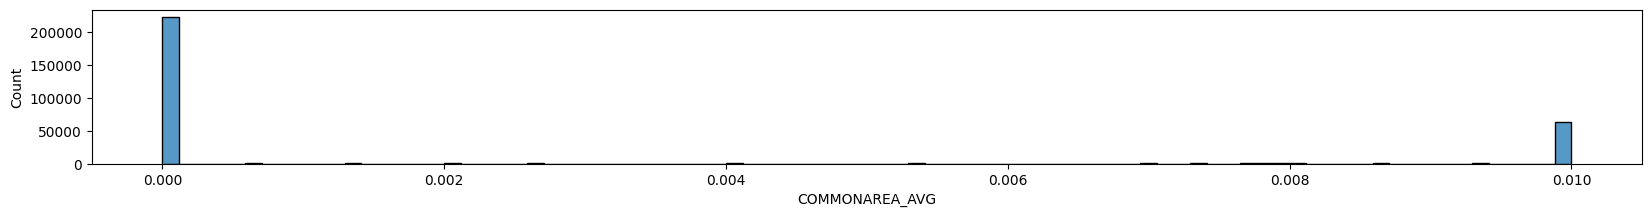

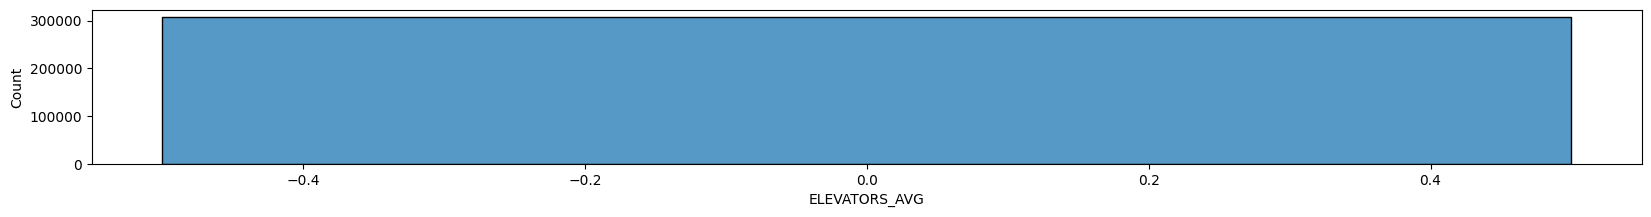

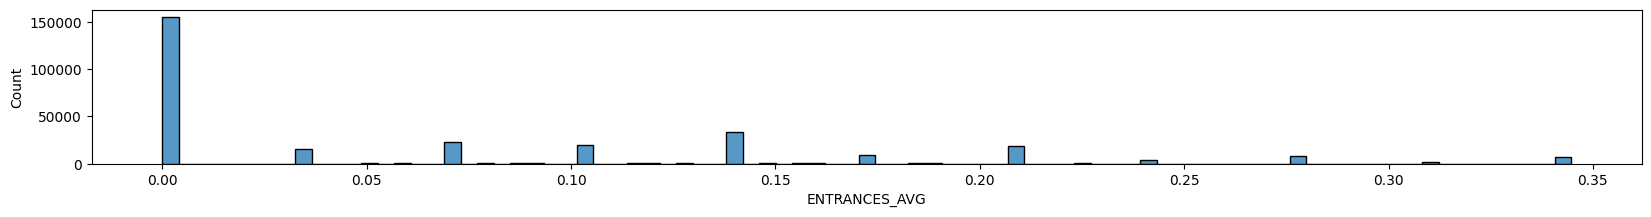

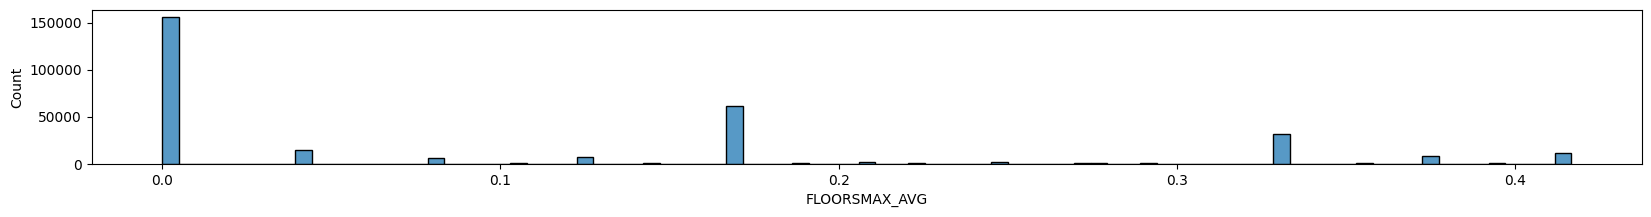

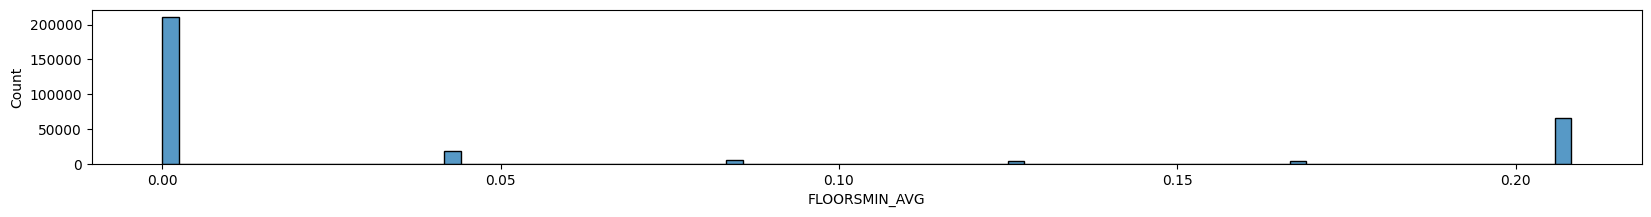

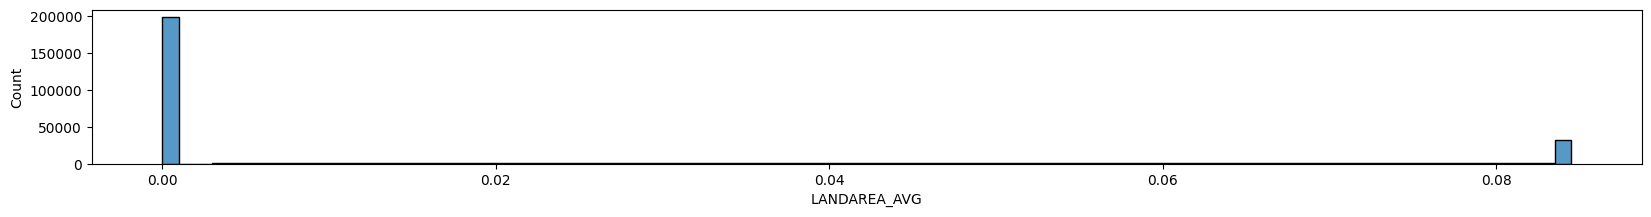

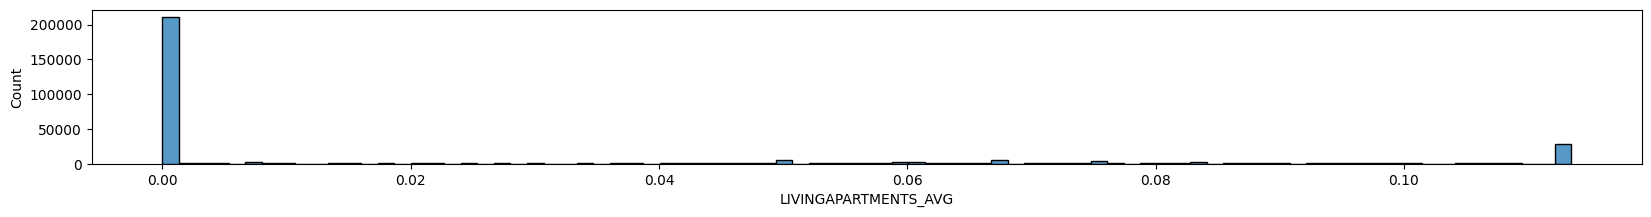

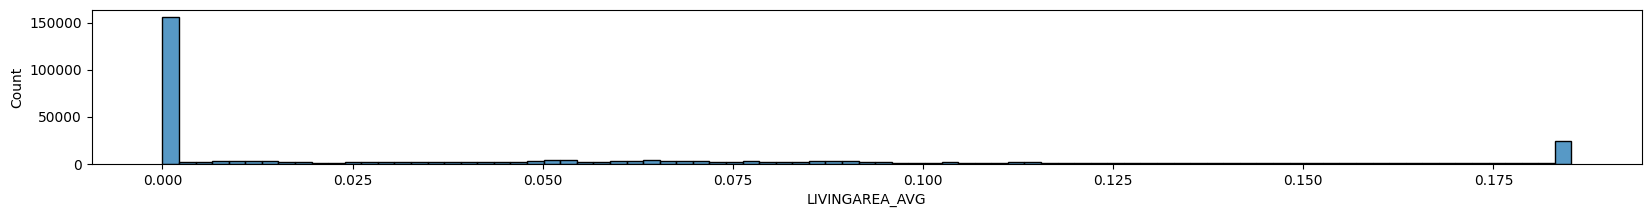

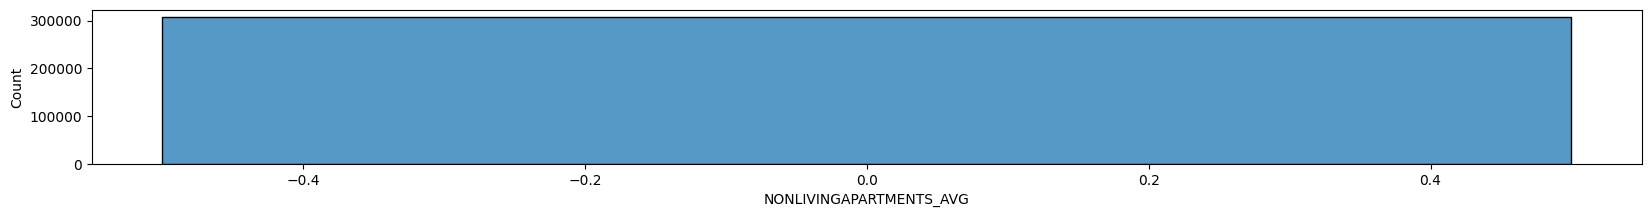

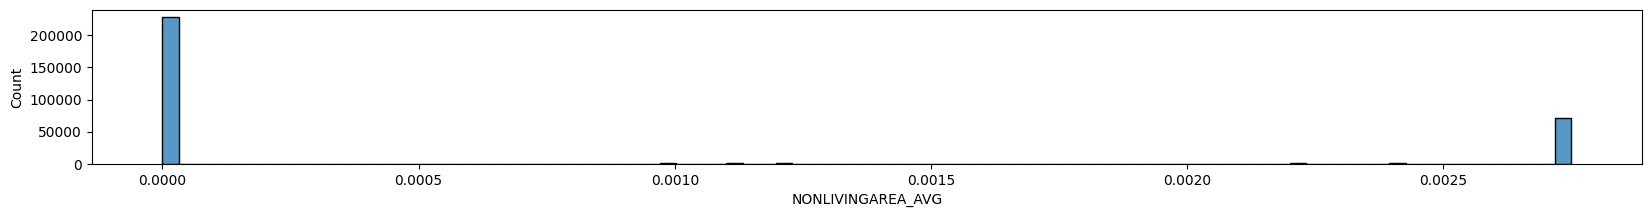

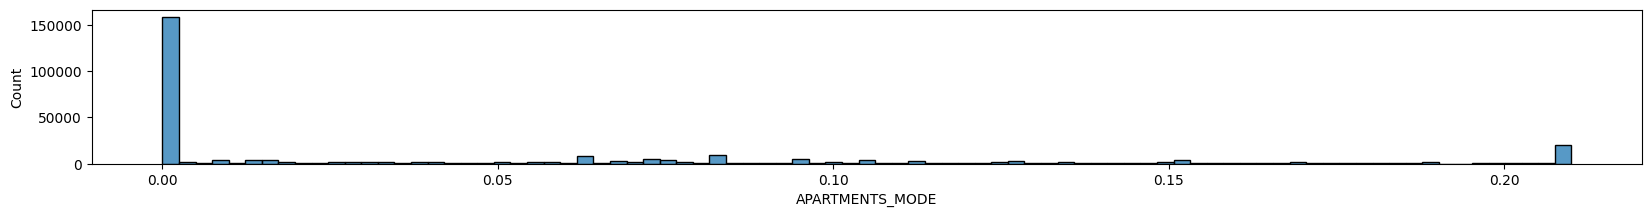

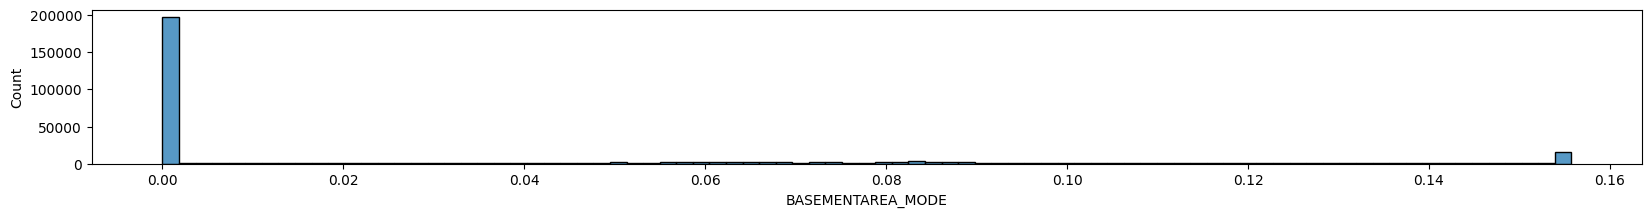

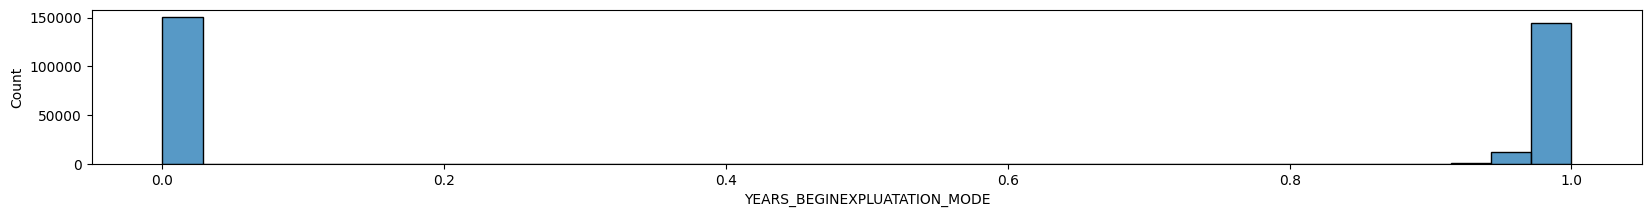

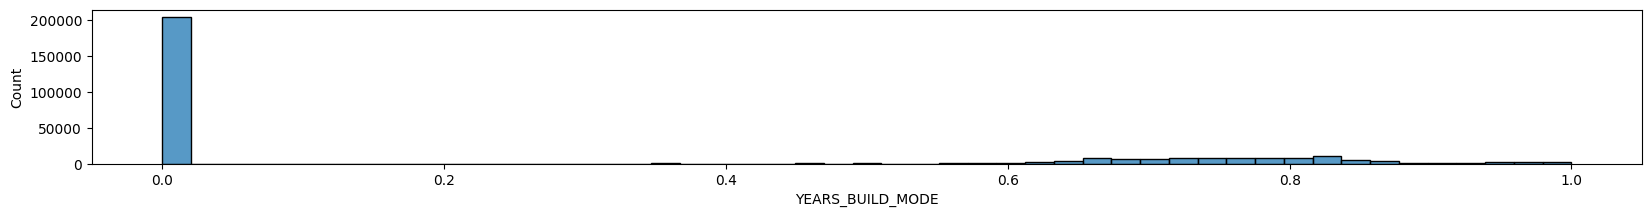

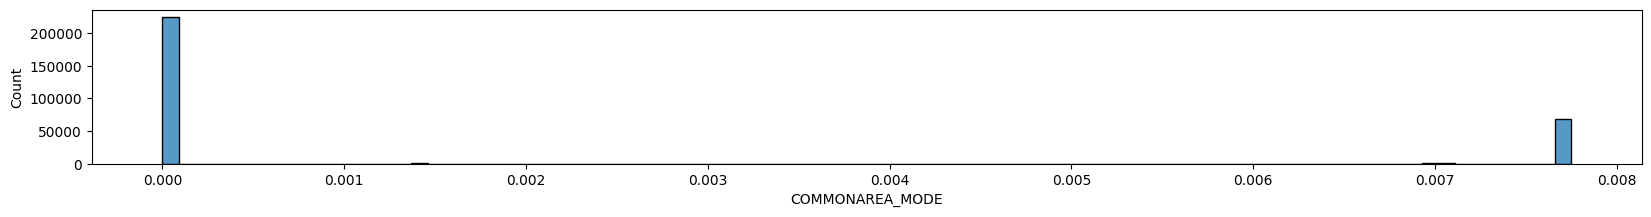

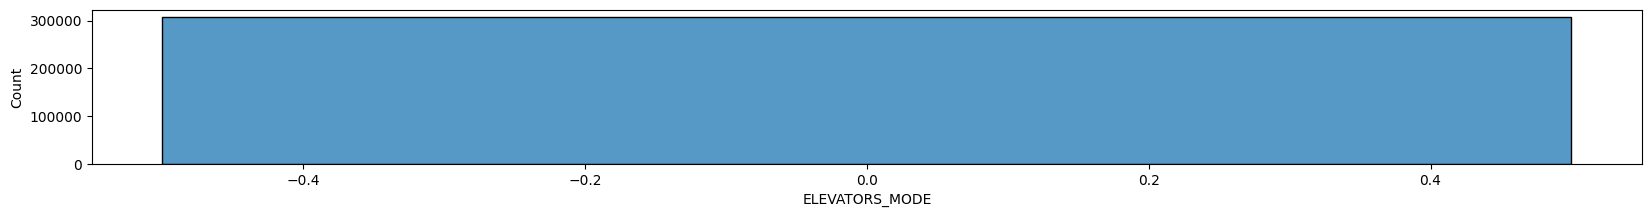

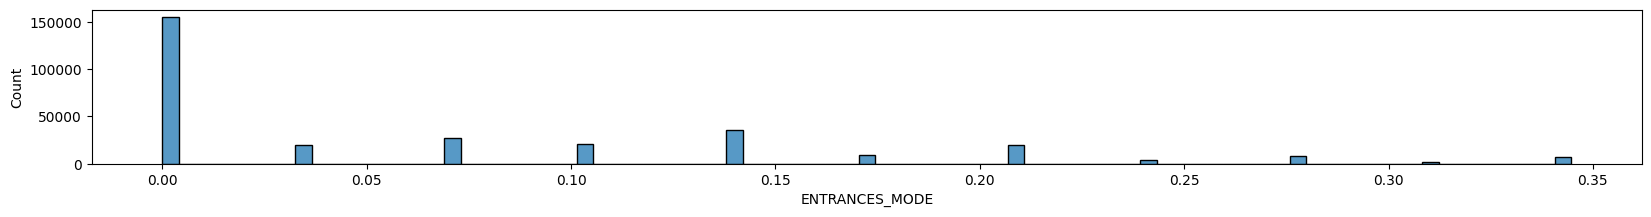

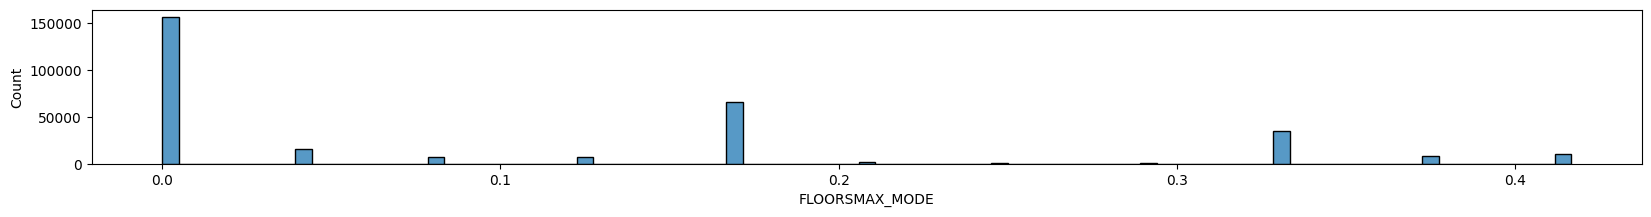

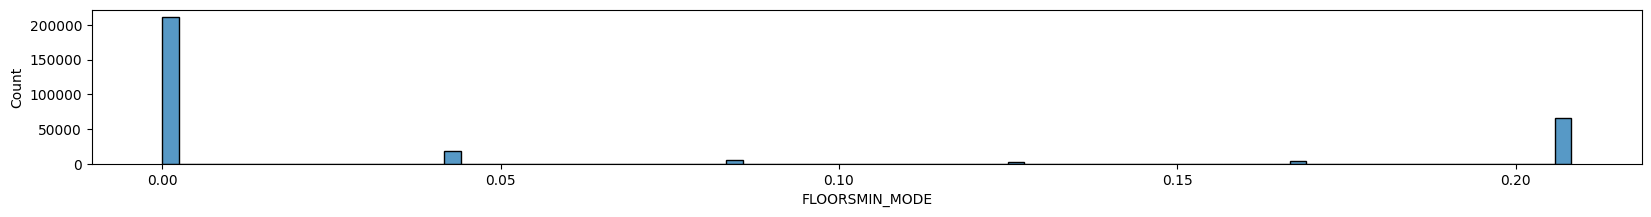

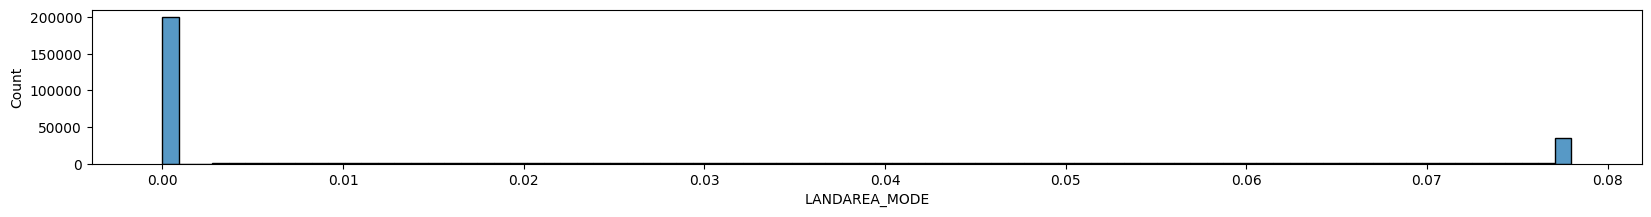

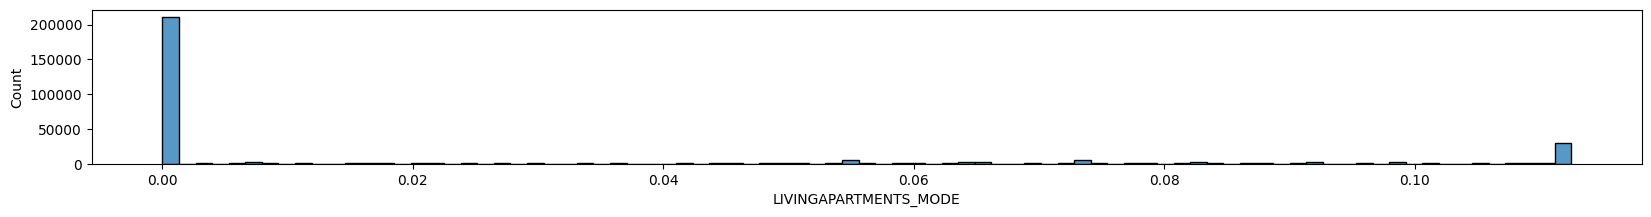

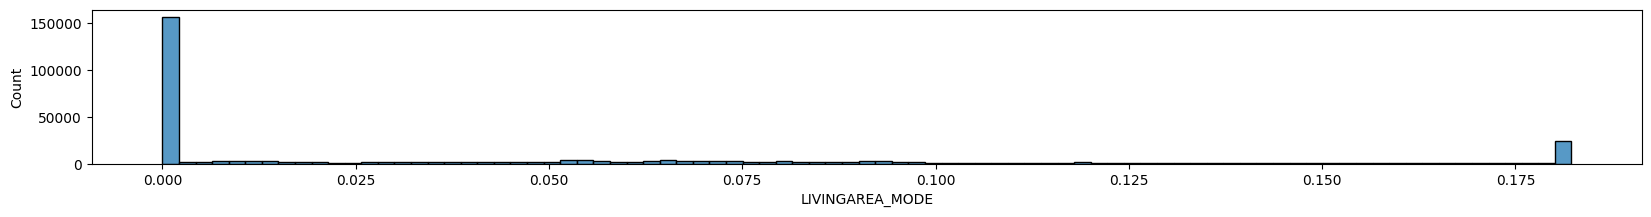

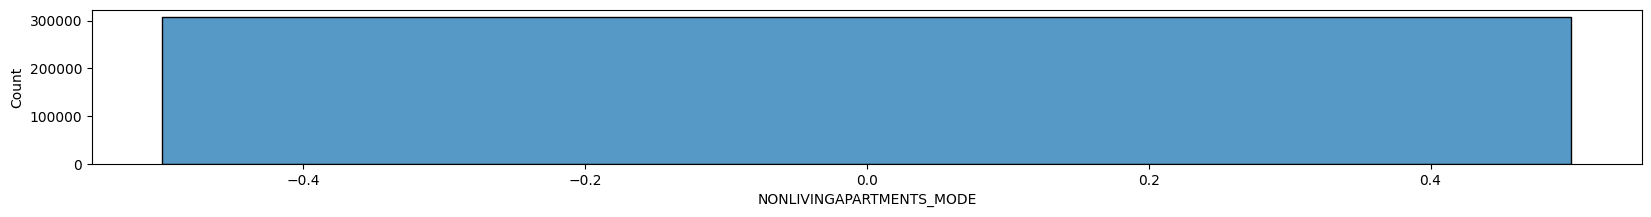

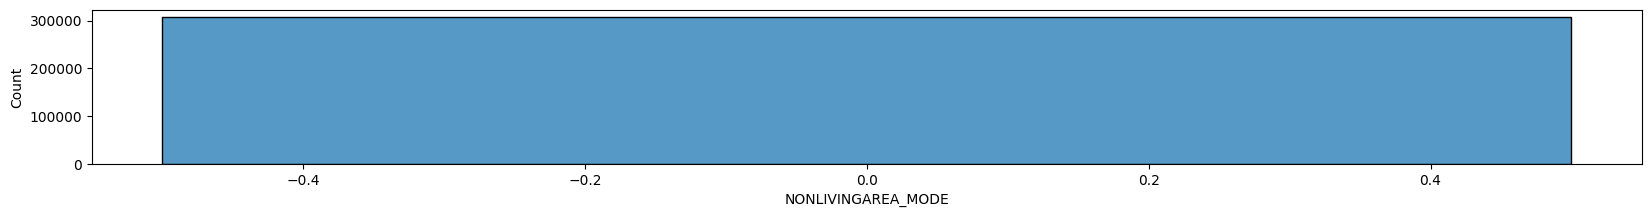

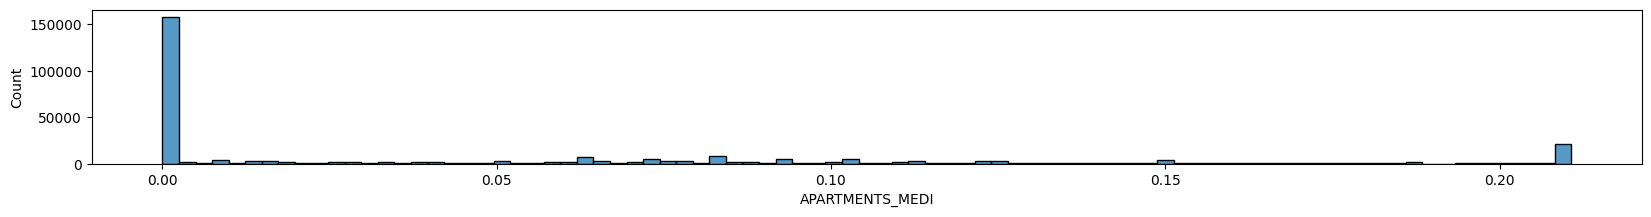

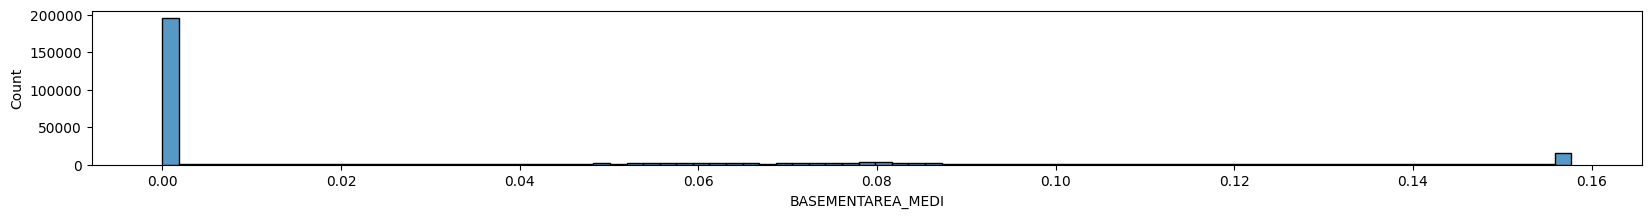

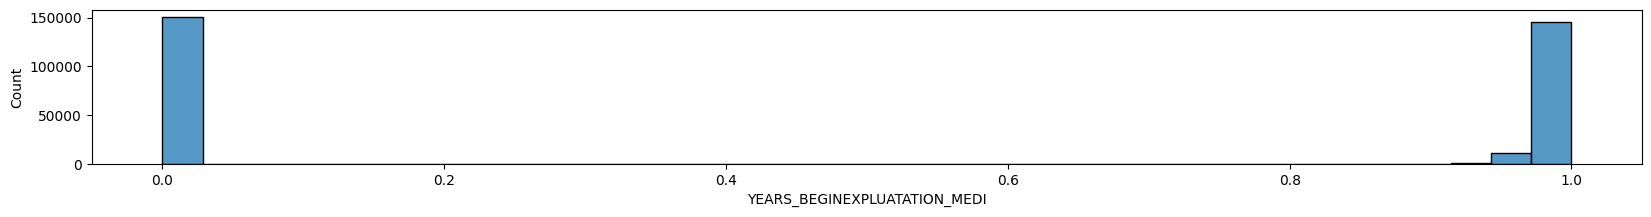

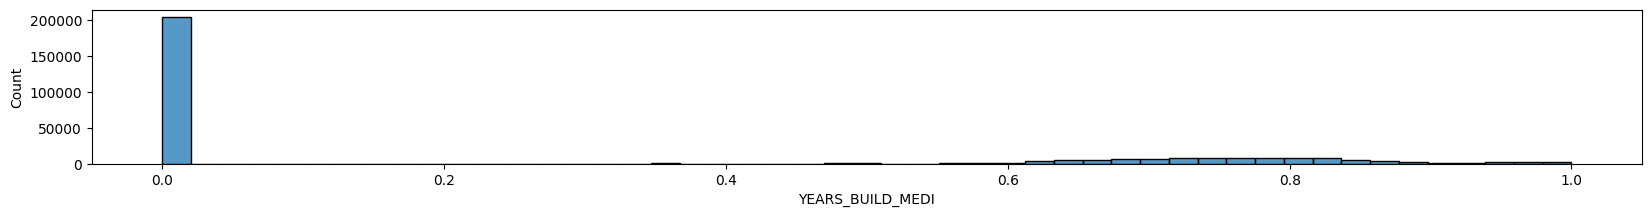

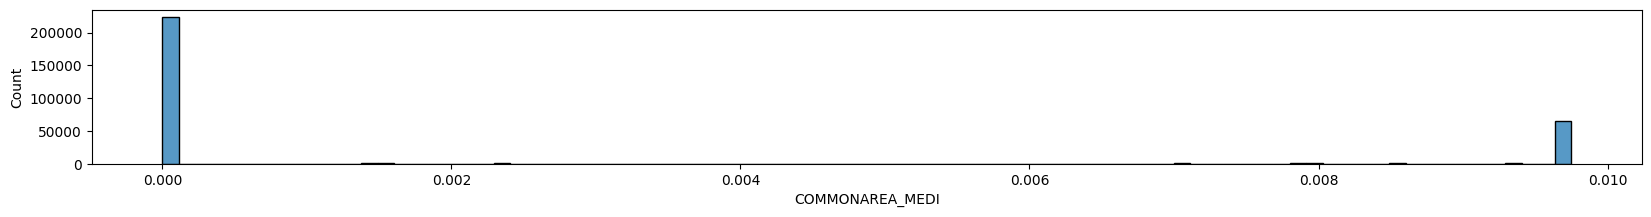

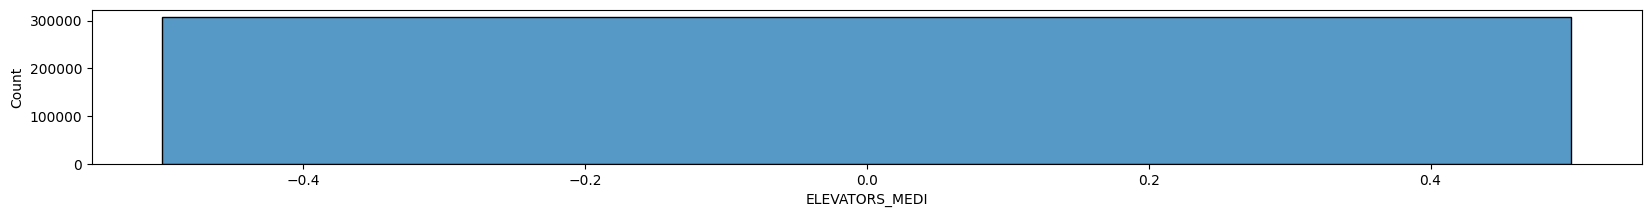

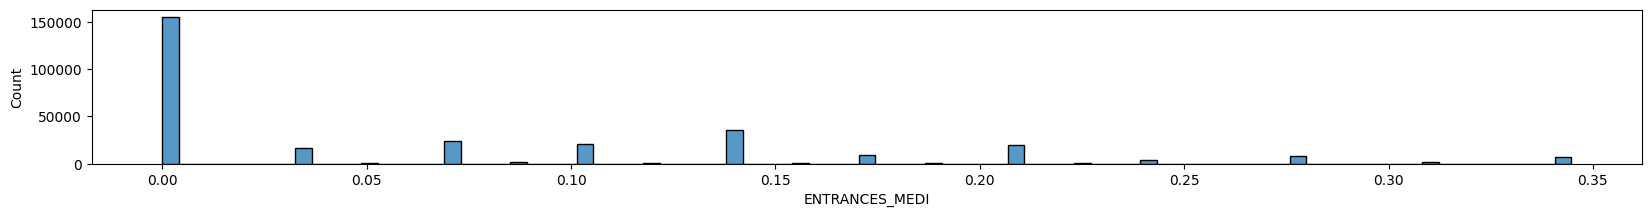

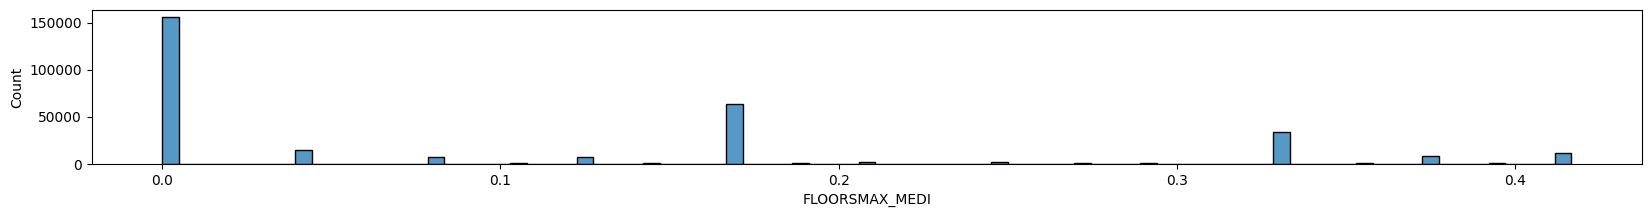

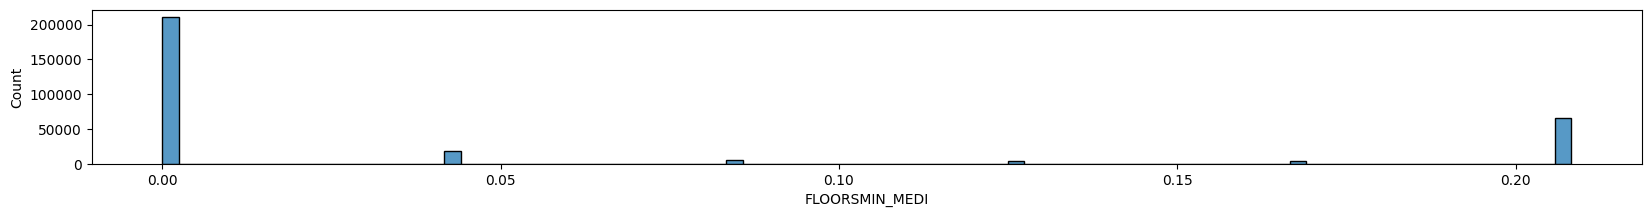

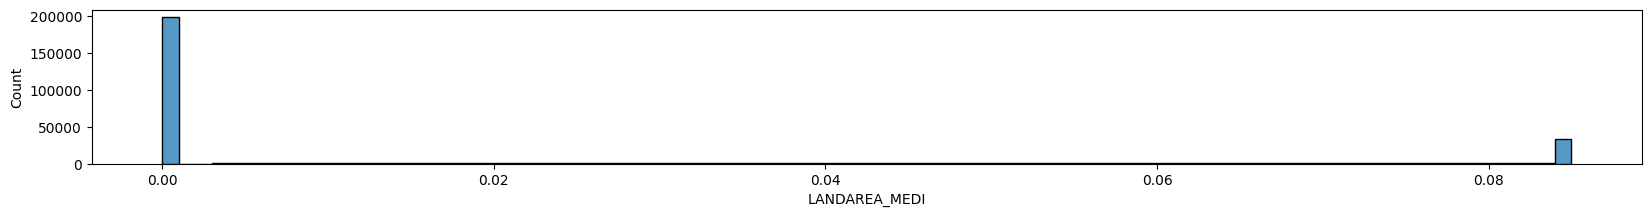

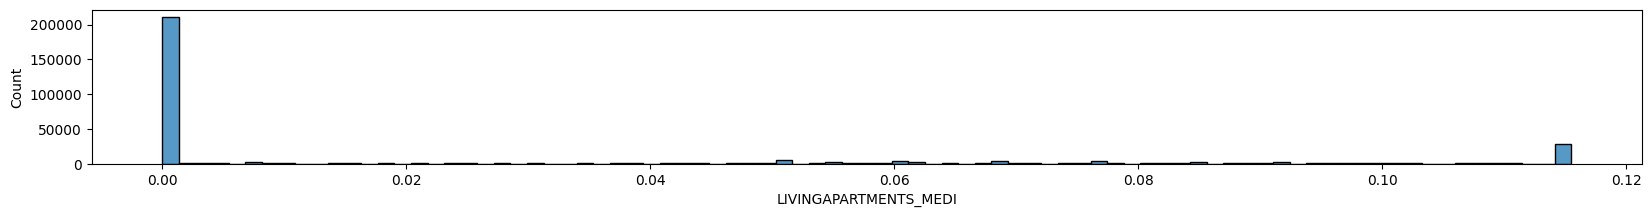

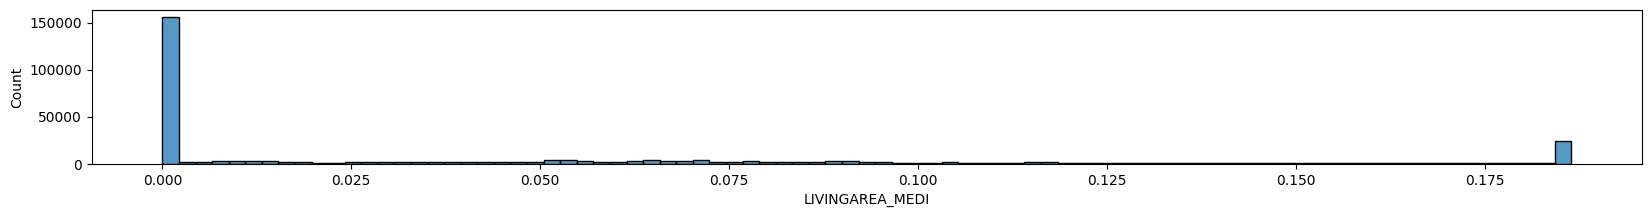

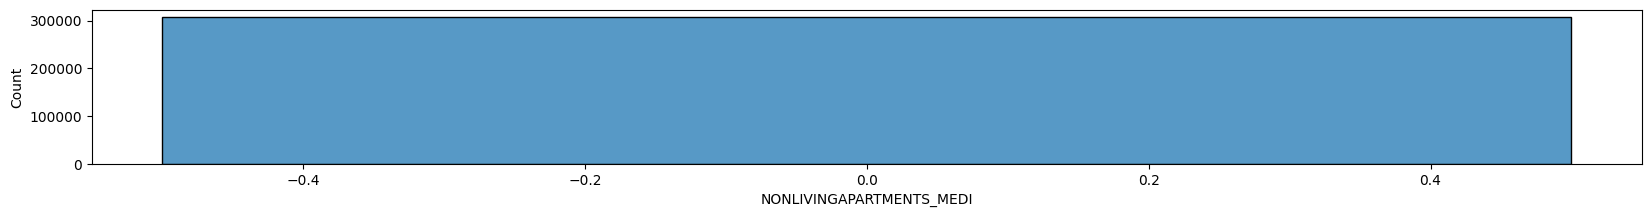

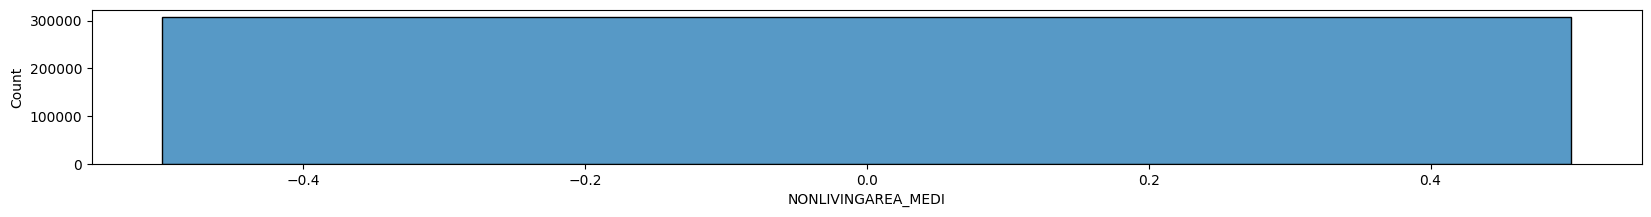

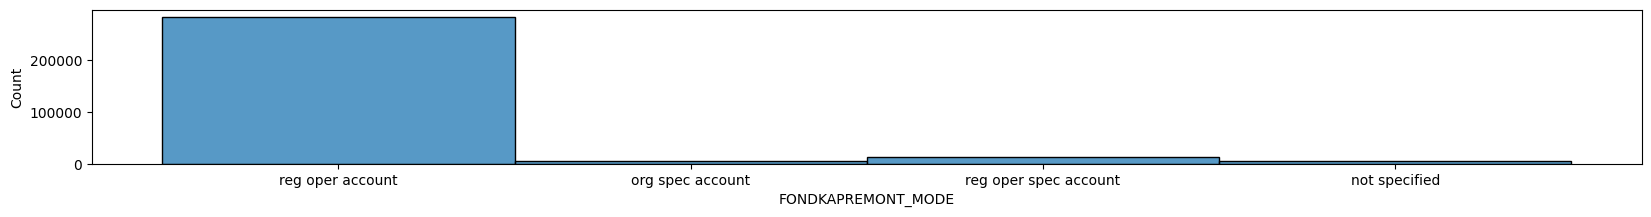

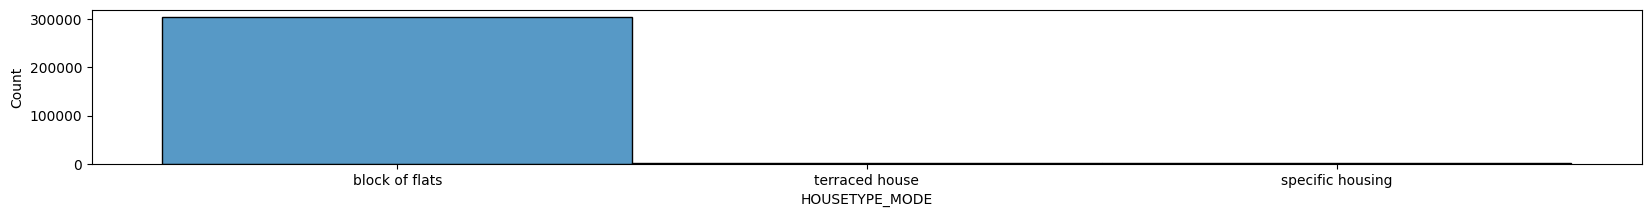

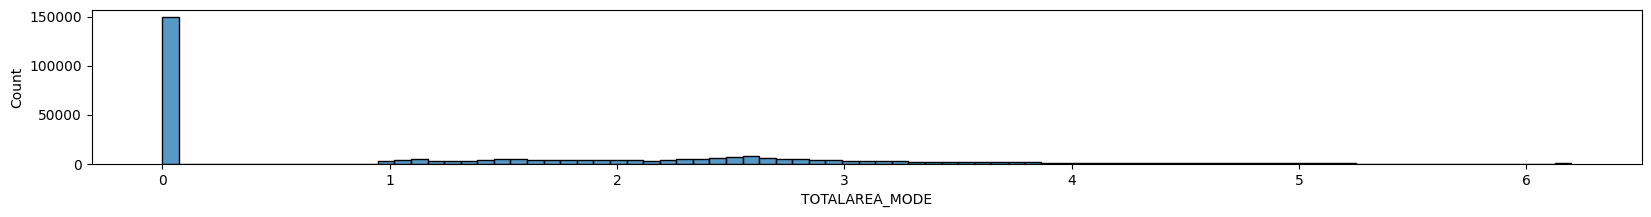

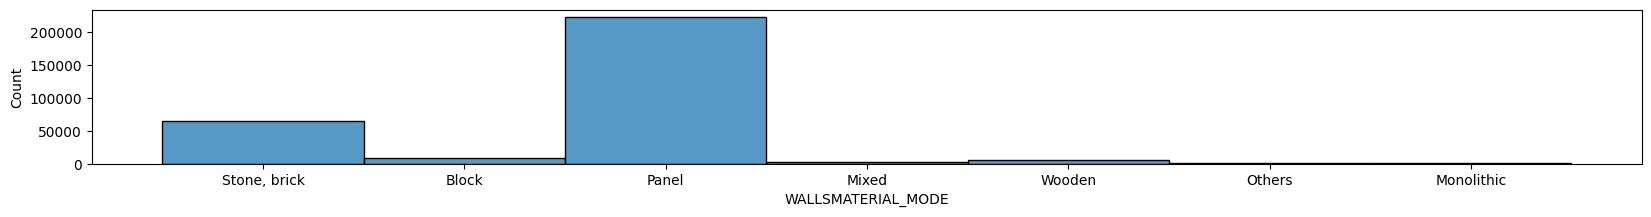

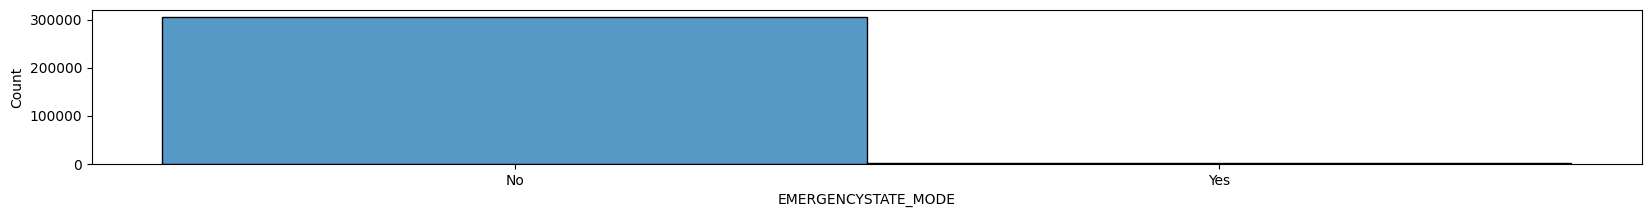

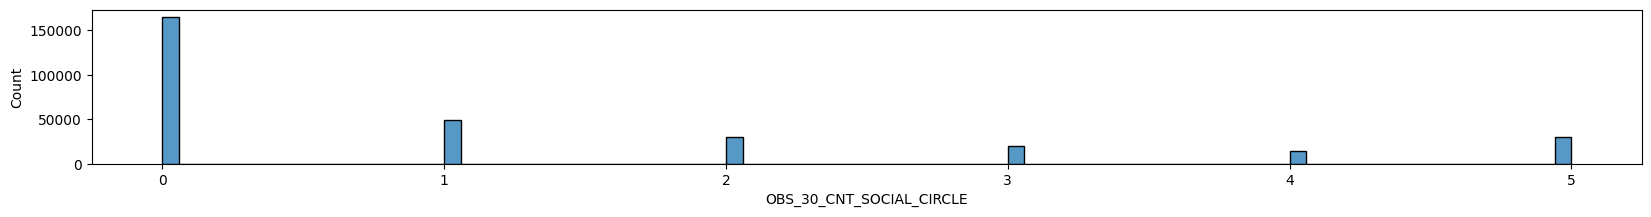

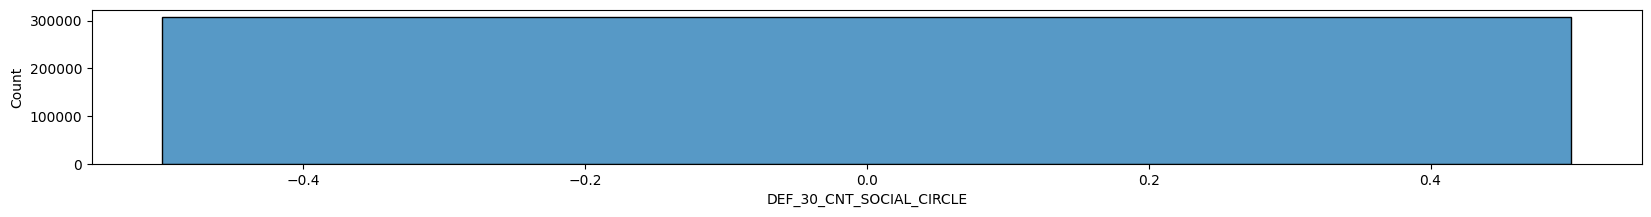

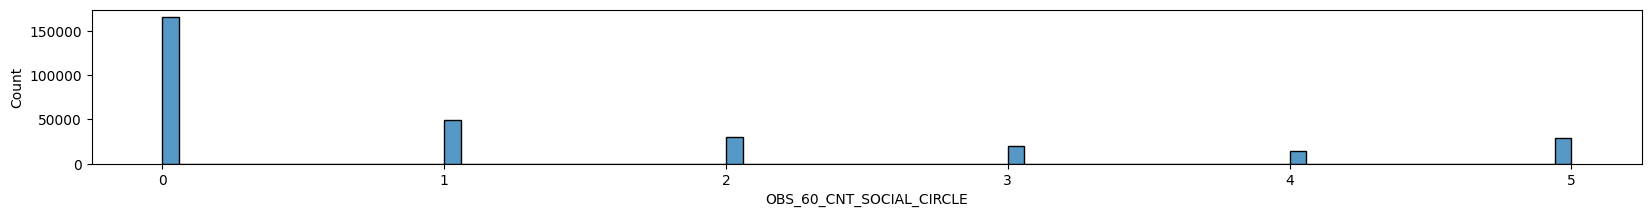

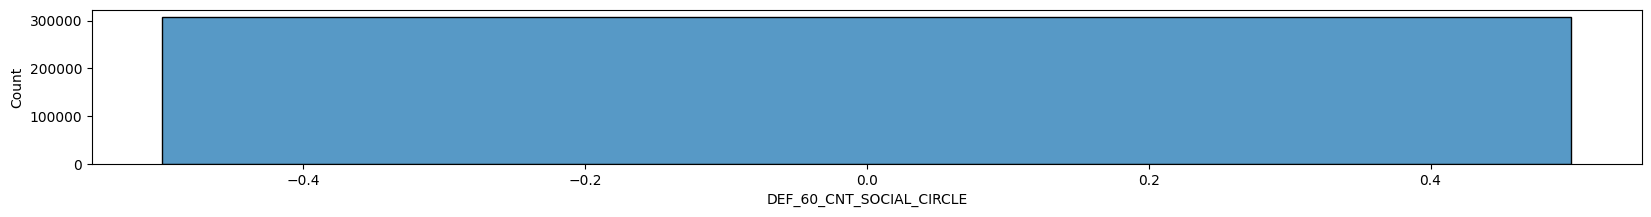

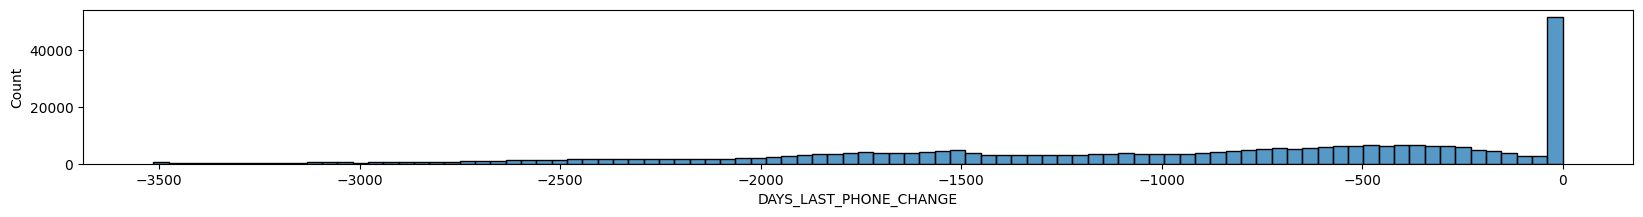

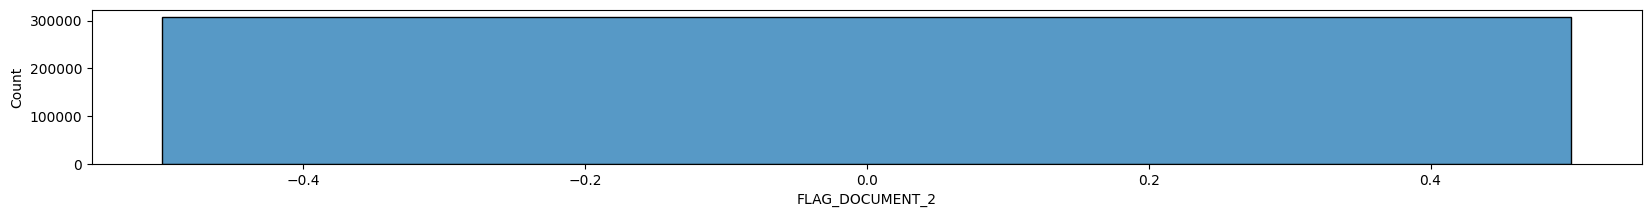

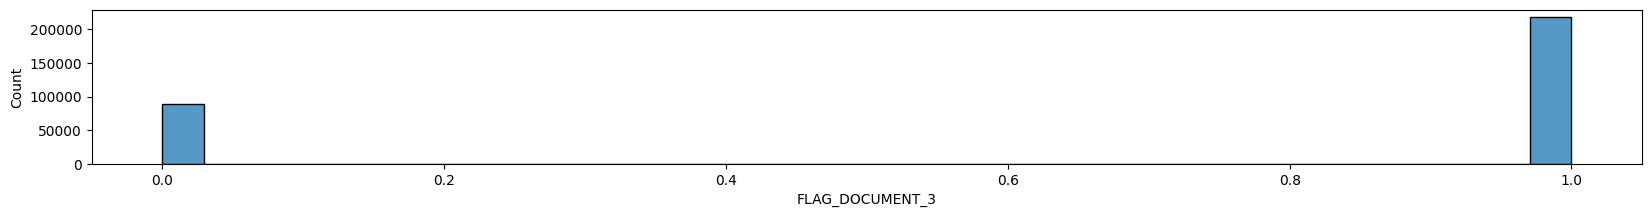

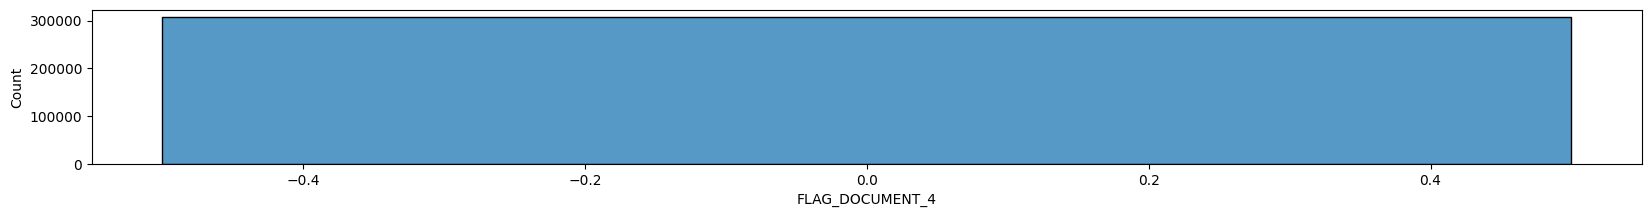

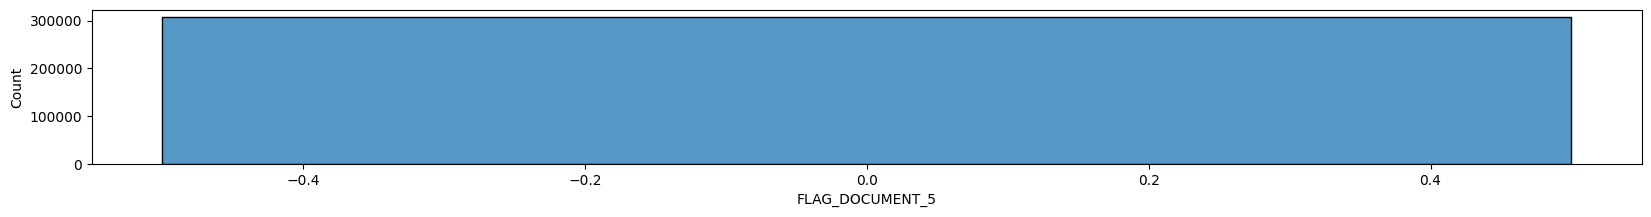

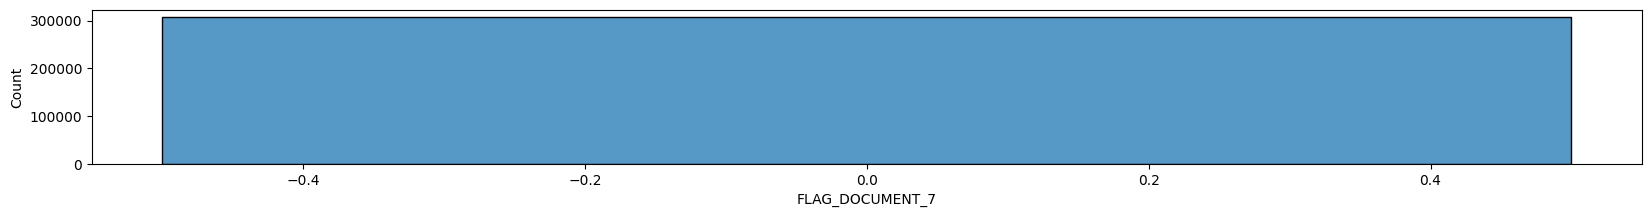

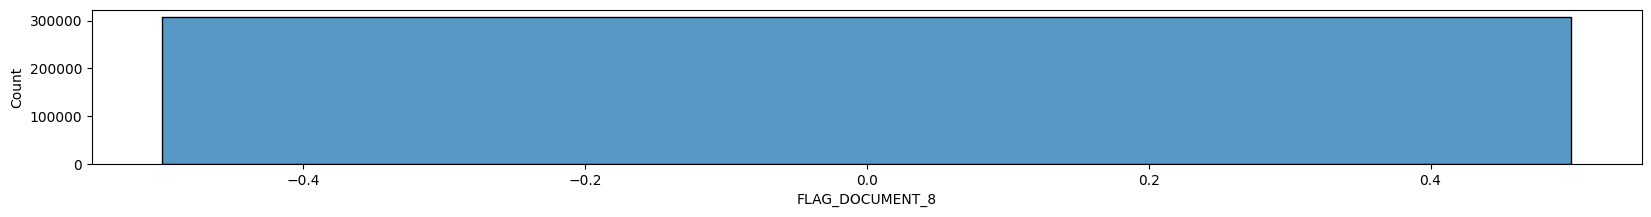

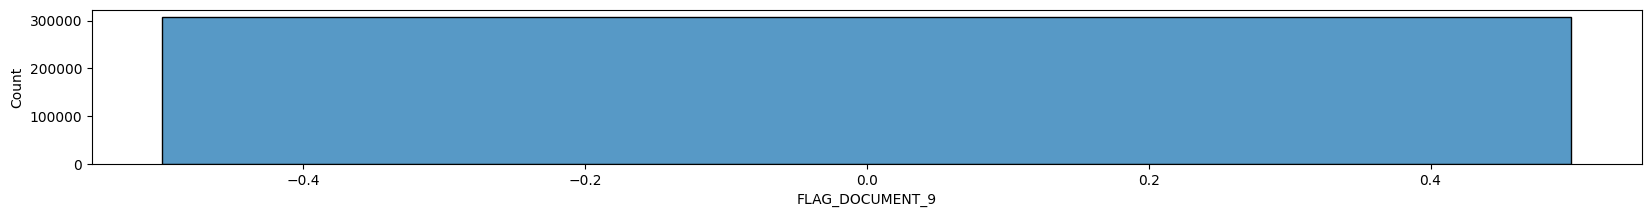

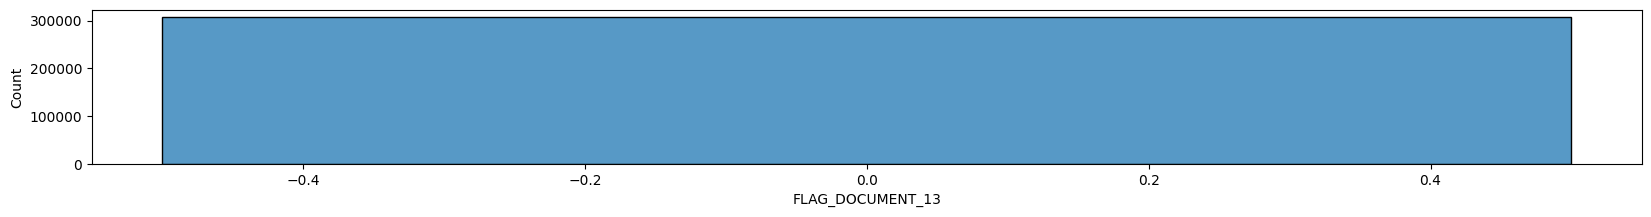

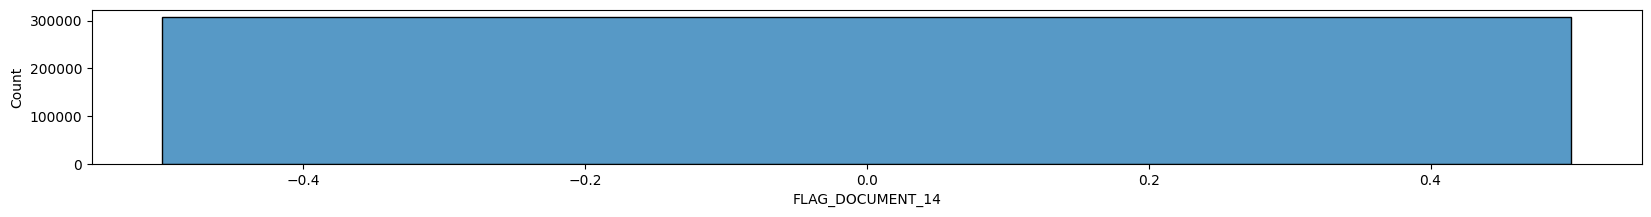

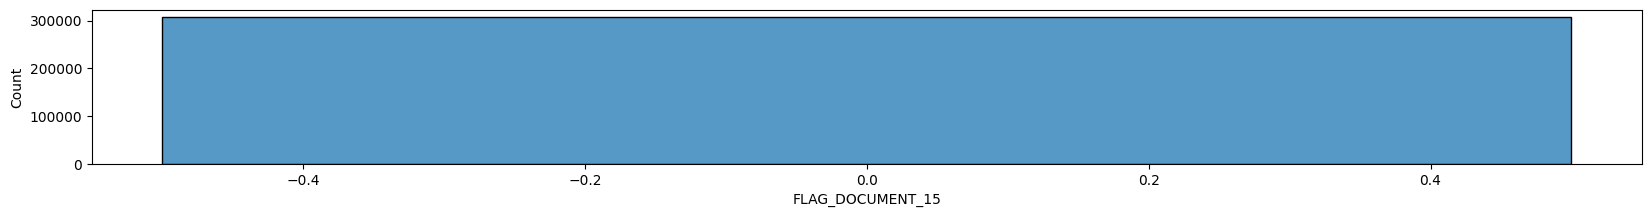

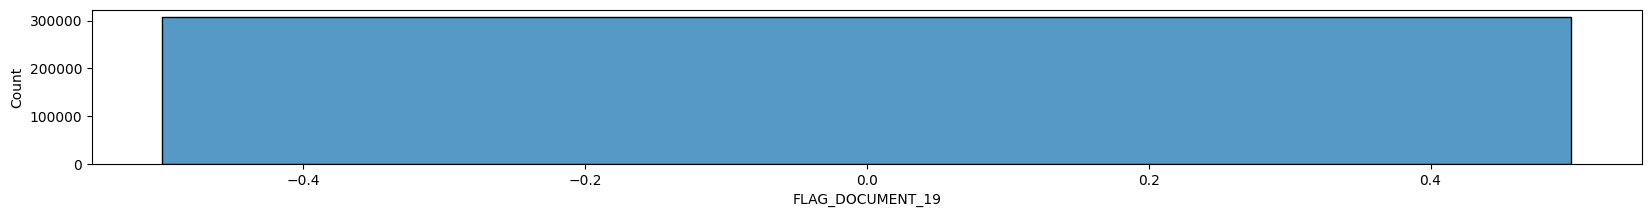

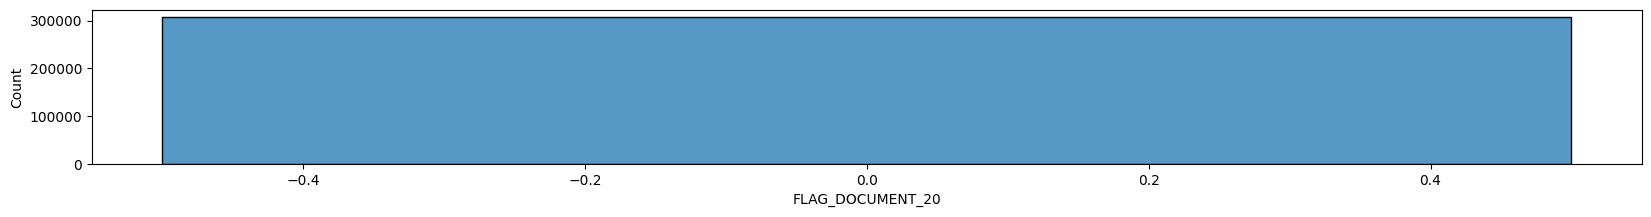

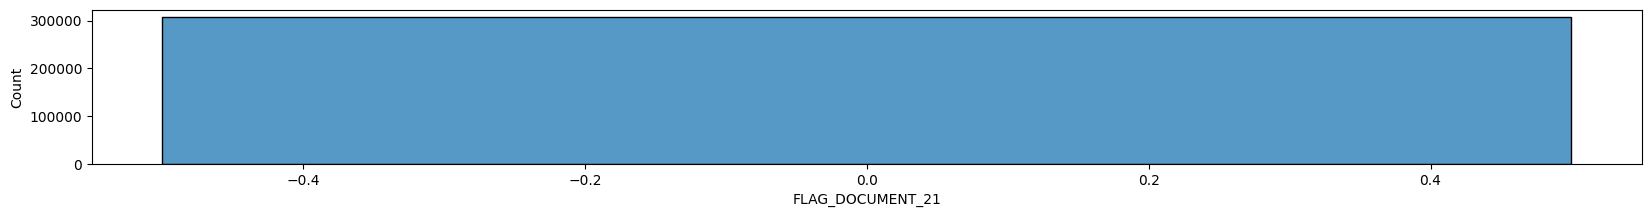

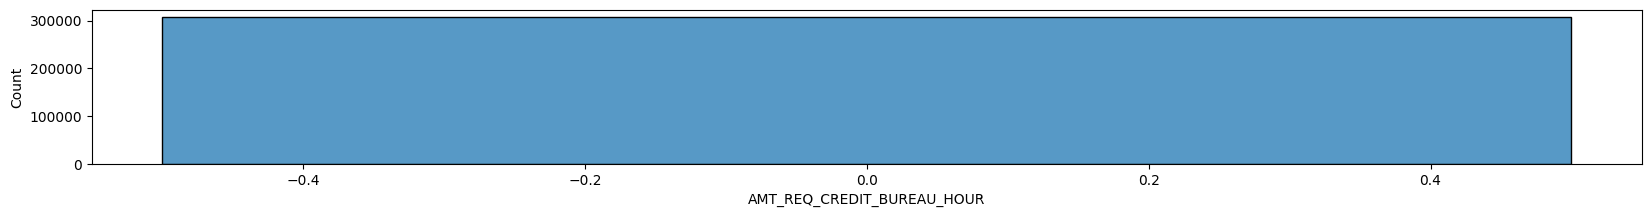

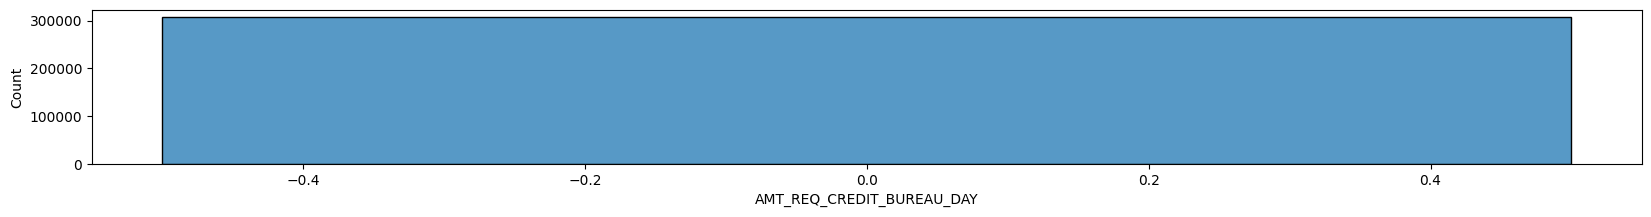

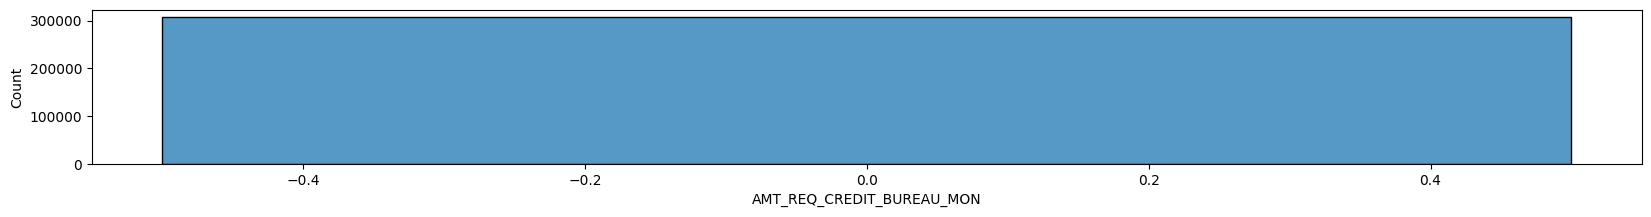

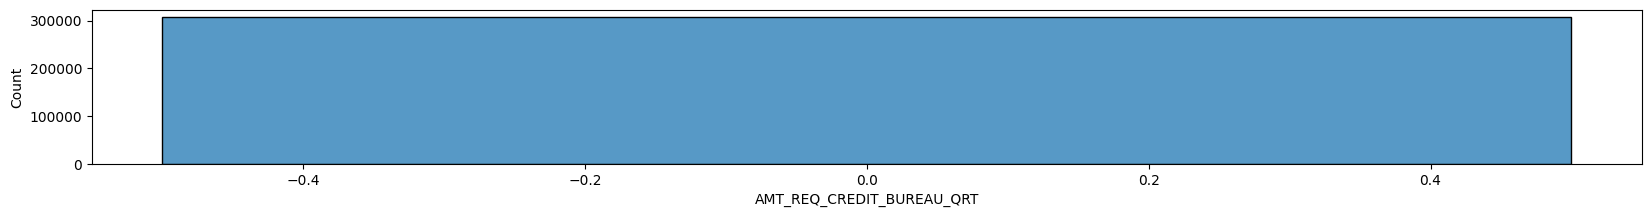

In [15]:
# distribusi data
for kol in aptrain: 
    plt.figure(figsize=(20,2))
    sns.histplot(data=aptrain, x=kol)
    plt.show()

In [16]:
# cek nilai unik abjek 
objek = aptrain.select_dtypes(include=['object'])
for kol in aptrain.select_dtypes(include=['object']).columns:
    unik = aptrain[kol].unique()
    print(f'kolom {kol}')
    print(unik)
    print('-'*50)

kolom NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
--------------------------------------------------
kolom CODE_GENDER
['M' 'F' 'XNA']
--------------------------------------------------
kolom FLAG_OWN_CAR
['N' 'Y']
--------------------------------------------------
kolom FLAG_OWN_REALTY
['Y' 'N']
--------------------------------------------------
kolom NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
--------------------------------------------------
kolom NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
--------------------------------------------------
kolom NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
--------------------------------------------------
kolom NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'

In [17]:
# baca objek 
objek.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
0  Business Entity Type 3   reg oper account  block of flats   
1                  School   reg oper account  block of flats   
2              Government   reg oper account  block of flats   
3  Business Entity Type 3   reg oper account  block of flats   
4                Religion   reg oper account  block of flats   

  WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       Stone, brick                  No  
1              Block                  No  
2              Panel                  No  
3              Panel                  No  
4              Panel                  No

In [18]:
# labeling 
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
for kol in aptrain.select_dtypes(include=['object']).columns: 
    aptrain[kol] = le.fit_transform(aptrain[kol])

aptrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(100), int32(16), int64(5)
memory usage: 265.1 MB


In [19]:
# gabung dataset target
aptrain["TARGET"] = target

selected_columns = [
    "CODE_GENDER", "DAYS_BIRTH", "NAME_FAMILY_STATUS", "CNT_CHILDREN", "CNT_FAM_MEMBERS",
    "AMT_INCOME_TOTAL", "NAME_INCOME_TYPE", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "OWN_CAR_AGE",
    "DAYS_EMPLOYED", "OCCUPATION_TYPE", "ORGANIZATION_TYPE",
    "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "NAME_CONTRACT_TYPE",
    "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3",
    "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
    "DAYS_LAST_PHONE_CHANGE", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_YEAR",
    "FLAG_OWN_REALTY", "NAME_HOUSING_TYPE", "TOTALAREA_MODE",
    "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "TARGET"
]

# Memfilter dataset hanya dengan kolom yang dipilih
aptrain = aptrain[selected_columns]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20152\2205844063.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aptrain["TARGET"] = target


In [20]:
# korelasi 
kore = aptrain.corr()
plt.figure(figsize=(50,30))
sns.heatmap(kore, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [21]:
# filter korelasi 
kore = aptrain.corr().abs() 

# Ambang batas korelasi
threshold = 0.01 

# filter kolom
high_corr_features = [column for column in kore.columns if any(kore[column][kore.index != column] > threshold)]

# Buat DataFrame baru dengan hanya kolom yang berkorelasi
aptrain_filtered = aptrain[high_corr_features]

# Cek kolom yang tersisa setelah filtering
print("Kolom setelah diproses:", aptrain_filtered.columns)

# Visualisasi heatmap setelah filtering
plt.figure(figsize=(50, 30))
sns.heatmap(aptrain_filtered.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Kolom setelah diproses: Index(['CODE_GENDER', 'DAYS_BIRTH', 'NAME_FAMILY_STATUS', 'CNT_CHILDREN',
       'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'NAME_CONTRACT_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE',
       'TOTALAREA_MODE', 'FLAG_DOCUMENT_3', 'TARGET'],
      dtype='object')


## Data visualization and Business Insight

In [22]:
# data unik kontrak tipe
aptrain["NAME_CONTRACT_TYPE"].unique()

array([0, 1])

In [23]:
# distribusi jenis kontrak kredit 
plt.figure(figsize=(8,5))
plt.hist(aptrain["NAME_CONTRACT_TYPE"].astype(int), bins=2, color="skyblue", alpha=0.7, edgecolor="black")
plt.xticks([0, 1], ["Cash loans", "Revolving loans"])  # Adjust the labels directly
plt.xlabel("Jenis Kontrak Kredit")
plt.ylabel("Jumlah Pemohon")
plt.title("Distribusi Jenis Kontrak Kredit")
plt.show()

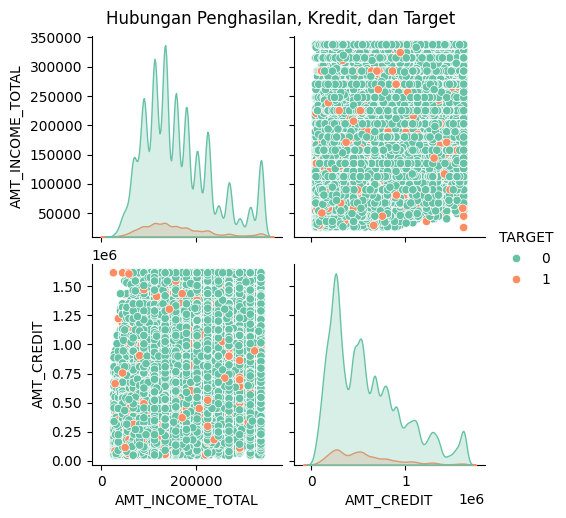

In [24]:
# korelasi antara penghasilan, kredit, dan resiko gagal bayar
sns.pairplot(aptrain[["AMT_INCOME_TOTAL", "AMT_CREDIT", "TARGET"]], hue="TARGET", palette="Set2")
plt.suptitle("Hubungan Penghasilan, Kredit, dan Target", y=1.02)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20152\804393429.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=aptrain, x="OCCUPATION_TYPE", y="TARGET", ci=None)


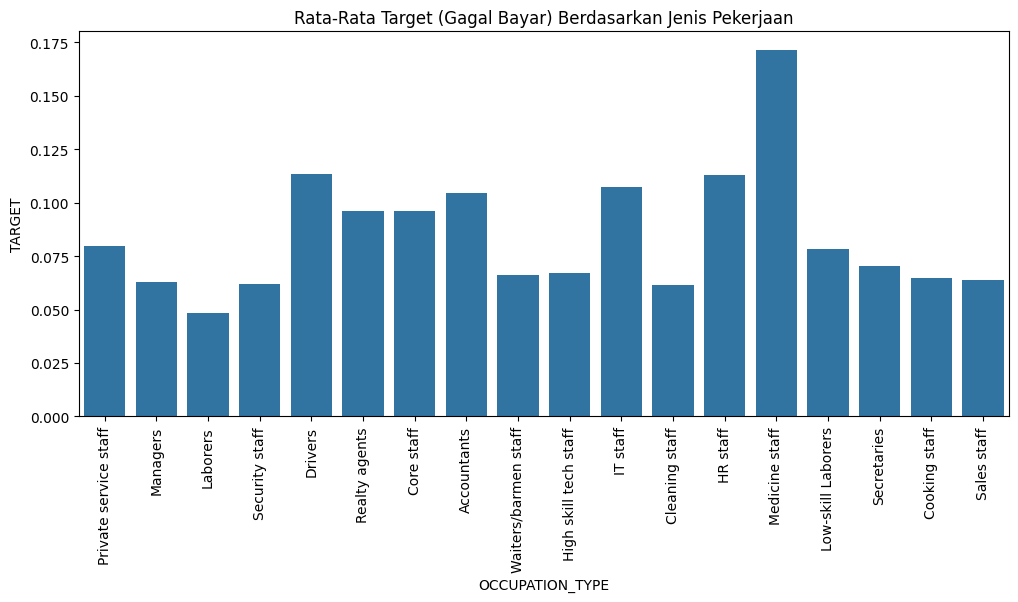

In [25]:
# visualisasi berdasarkan pekerjaan
occupation_mapping = {
    0: 'Laborers', 
    1: 'Core staff', 
    2: 'Accountants', 
    3: 'Managers', 
    4: 'Drivers', 
    5: 'Sales staff', 
    6: 'Cleaning staff', 
    7: 'Cooking staff', 
    8: 'Private service staff', 
    9: 'Medicine staff', 
    10: 'Security staff', 
    11: 'High skill tech staff', 
    12: 'Waiters/barmen staff', 
    13: 'Low-skill Laborers', 
    14: 'Realty agents', 
    15: 'Secretaries', 
    16: 'IT staff', 
    17: 'HR staff'
}
aptrain['OCCUPATION_TYPE'] = aptrain['OCCUPATION_TYPE'].map(occupation_mapping)
plt.figure(figsize=(12, 5))
sns.barplot(data=aptrain, x="OCCUPATION_TYPE", y="TARGET", ci=None)
plt.xticks(rotation=90)
plt.title("Rata-Rata Target (Gagal Bayar) Berdasarkan Jenis Pekerjaan")
plt.show()

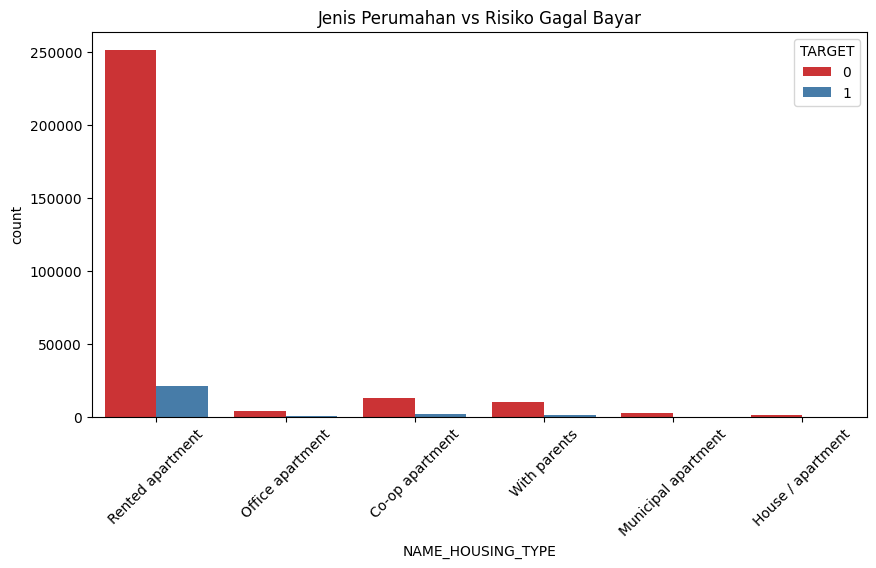

In [26]:
# berdasarkan rumah 
housing_mapping = {
    0: 'House / apartment',
    1: 'Rented apartment',
    2: 'With parents',
    3: 'Municipal apartment',
    4: 'Office apartment',
    5: 'Co-op apartment'
}
aptrain['NAME_HOUSING_TYPE'] = aptrain['NAME_HOUSING_TYPE'].map(housing_mapping)r
plt.figure(figsize=(10, 5))
sns.countplot(data=aptrain, x="NAME_HOUSING_TYPE", hue="TARGET", palette="Set1")
plt.xticks(rotation=45)
plt.title("Jenis Perumahan vs Risiko Gagal Bayar")
plt.show()

## Machine Learning Implementation 

In [35]:
# split data 
x = aptrain_filtered.drop(columns='TARGET')
y = aptrain_filtered['TARGET'] 

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((246008, 26), (61503, 26), (246008,), (61503,))

In [37]:
# implementasi machine learning random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
ypred_rf = rf.predict(x_test)
ypred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# implementasi logistic regresion
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42, max_iter=500)
logreg.fit(x_train, y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [40]:
ypred_logreg = logreg.predict(x_test)
ypred_logreg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Evaluation

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

akurasi_rf = accuracy_score(y_test, ypred_rf)
akurasi_logreg = accuracy_score(y_test, ypred_logreg)
cf_rf = confusion_matrix(y_test, ypred_rf)
cf_logreg = confusion_matrix(y_test, ypred_logreg)
cr_rf = classification_report(y_test, ypred_rf)
cr_logreg = classification_report(y_test, ypred_logreg)

In [42]:
#akurasi model
print (akurasi_rf)
print (akurasi_logreg)

0.9195974180121295
0.9194836024258979


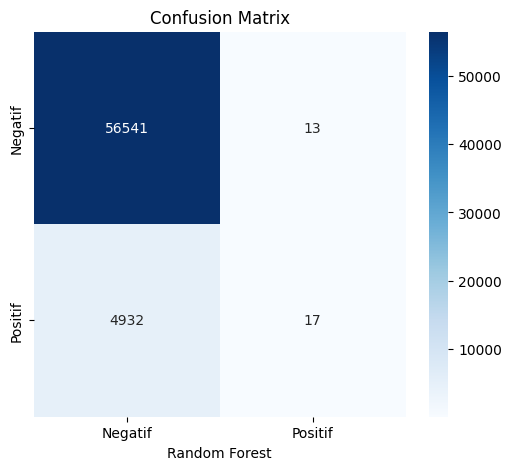

In [43]:
# visualisasi confusion matrix model random forest
plt.figure(figsize=(6, 5))
sns.heatmap(cf_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Random Forest')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# visualisasi confusion matrix model logistic regression
plt.figure(figsize=(6, 5))
sns.heatmap(cf_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Logistic Regression')
plt.title('Confusion Matrix')
plt.show()

In [45]:
print (cr_rf)
print (cr_logreg)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.57      0.00      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.74      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



## Business recommendation

- diketahui bahwa peminjam yang bertempat tinggal di rented apartement memiliki resiko gagal bayar yang lebih besar dibandingkan dengan peminjam lainnya, rekomendasi bisnis yang dapat dilakukan oleh perusahaan adalah dengan menyediakan produk asuransi yang dapat melindungi peminjam jika terjadi gagal bayar. 
contoh : asuransi kredit dengan jaminan penghasilan dimana asuransi dapat mengcover 6 bulan cicilan jika peminjam tidak mampu membayar sementara
- diketahui peminjam yang memiliki pekerjaan sebagai pekerja kasar (Laborers) memiliki resiko gagal bayar yang lebih besar dibandingkan dengan peminjam lainnya, rekomendasi bisnis yang dapat dilakukan oleh perusahaan adalah dengan memberikan pilihan pembayaran lebih fleksibel dengan adanya jaminan tambahan.
contoh : peminjam yang bekerja sebagai pekerja kasar dapat menggunakan co-signer dari keluarga atau teman yang memiliki penghasilan lebih stabil dan riwayat kredit lebih baik untuk mendapatkan pinjaman. 